<a href="https://colab.research.google.com/github/Shailendra114/Books-Recommendation-System-Unsupervised-Machine-Learning-/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===================================================================================================================


# Books Recommendation System

A recommendation engine is a class of machine learning which offers relevant suggestions to the customer. Before the recommendation system, the major tendency to buy was to take a suggestion from friends. But Now Google knows what news you will read, Youtube knows what type of videos you will watch based on your search history, watch history, or purchase history. A recommendation system helps an organization to create loyal customers and build trust by them desired products and services for which they came on your site. The recommendation system today are so powerful that they can handle the new customer too who has visited the site for the first time. They recommend the products which are currently trending or highly rated and they can also recommend the products which bring maximum profit to the company. For this particular project we have used collabrotive filtering.

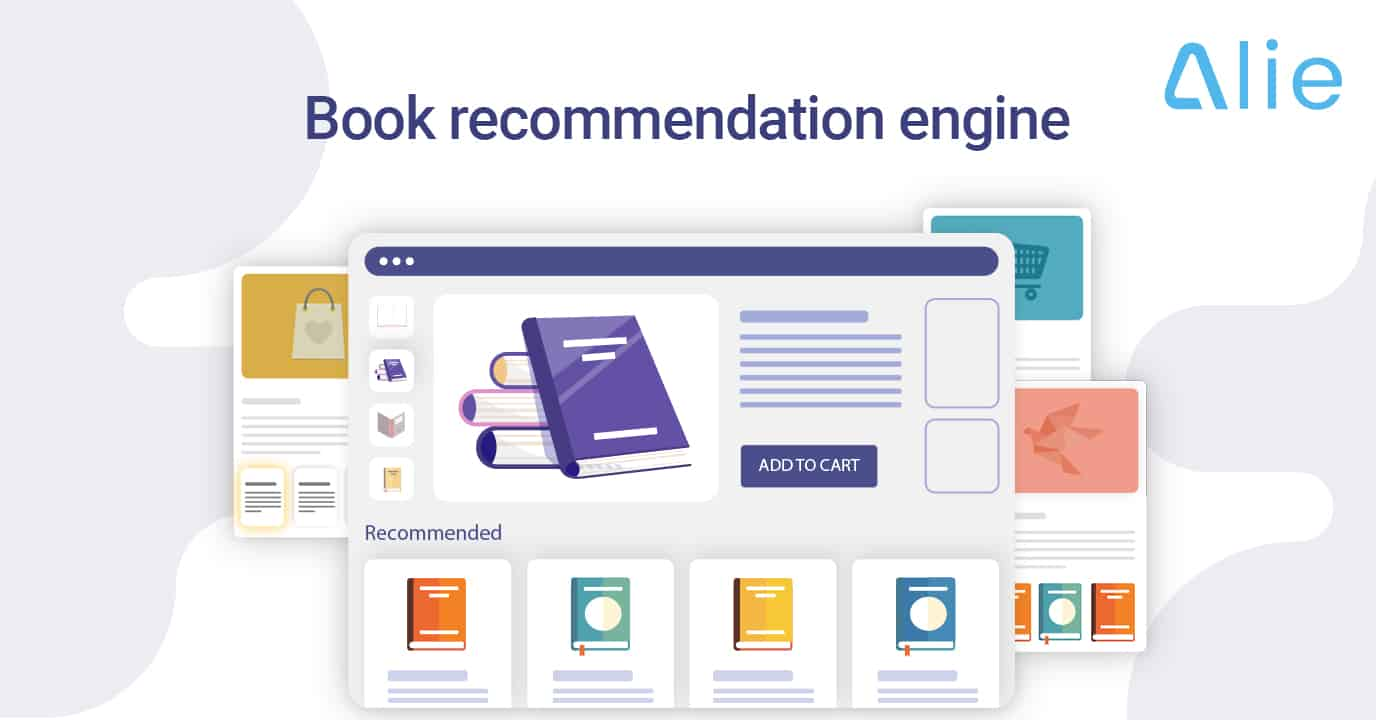

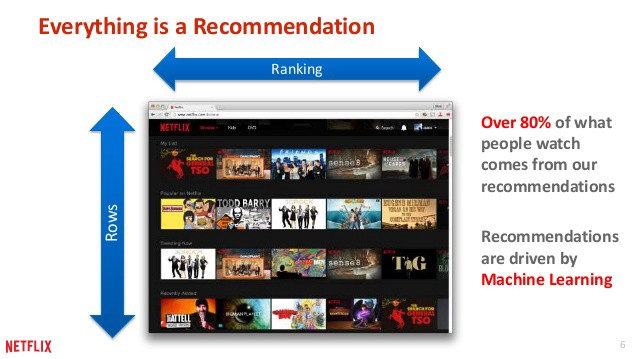

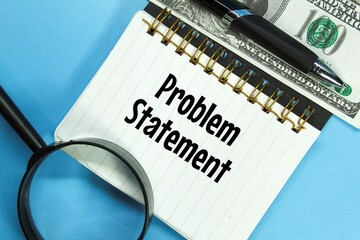

# Problem Statement

The traditional book ordering system is a manual and time-consuming process wherethe customer has to visit a bookstore to search and purchase the books. In this tightschedule, problems arise in finding specific books due to the inadequate distribution of books through the bookshop. The buyer could not get a recommendation for the correctselection of books.

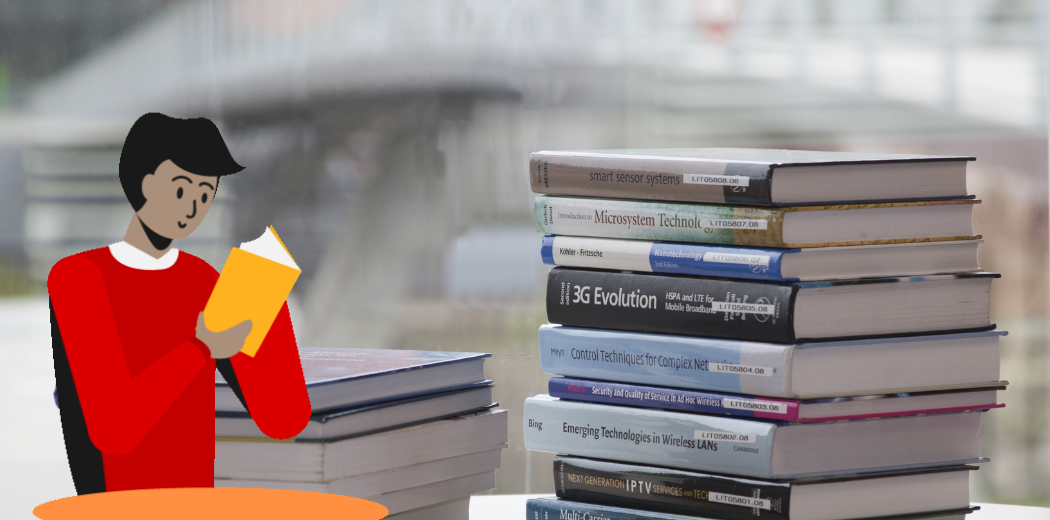

# Objective

Recommender systems have become a part of daily life for users of Amazon and Netflix and even social media. While some sites might use these systems to improve the customer experience (if you liked movie A, you might like movie B) or increase sales (customers who bought product C also bought product D), others are focused on customized advertising and suggestive marketing. As a book lover and former book store manager, I have always wondered where I can find good book recommendations that are both personalized to my interests and also capable of introducing me to new authors and genres. The purpose of this project is to create just such a recommender system (RS).

# Introduction


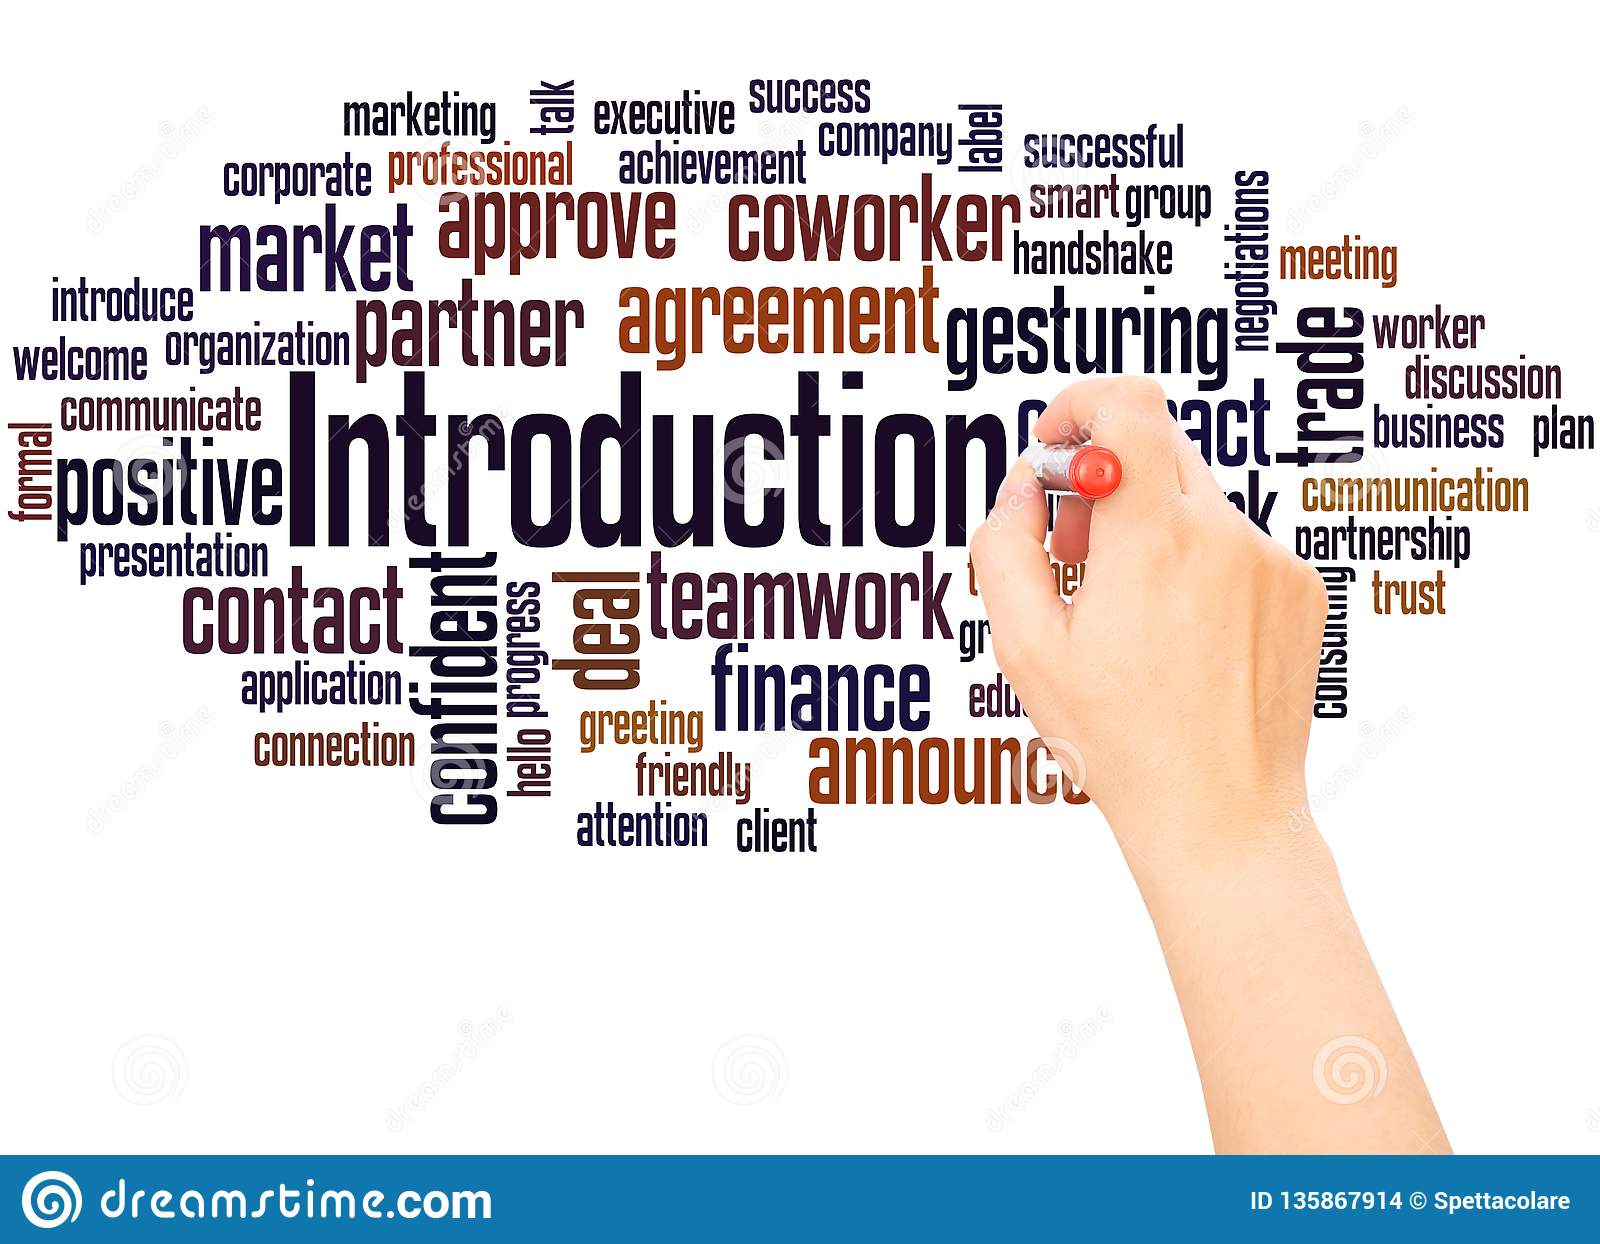

 

Virtually everyone has had an online experience where a website makes personalized recommendations in hopes of future sales or ongoing traffic. Amazon tells you “Customers Who Bought This Item Also Bought”, Udemy tells you “Students Who Viewed This Course Also Viewed”. And Netflix awarded a $1 million prize to a developer team in 2009, for an algorithm that increased the accuracy of the company’s recommendation system by 10 percent.
Building recommender systems today requires specialized expertise in analytics, machine learning and software engineering, and learning new skills and tools is difficult and time-consuming. In this post, we will start from scratch, covering some basic fundamental techniques and implementations in Python. In the future posts, we will cover more sophisticated methods such as content-based filtering and collaborative based filtering.
So, if you want to learn how to build a recommender system from scratch, let’s get started.

In [ ]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
warnings.filterwarnings('ignore')

# Plan of Attack


The process outline that we will be following througout the project is as follows===

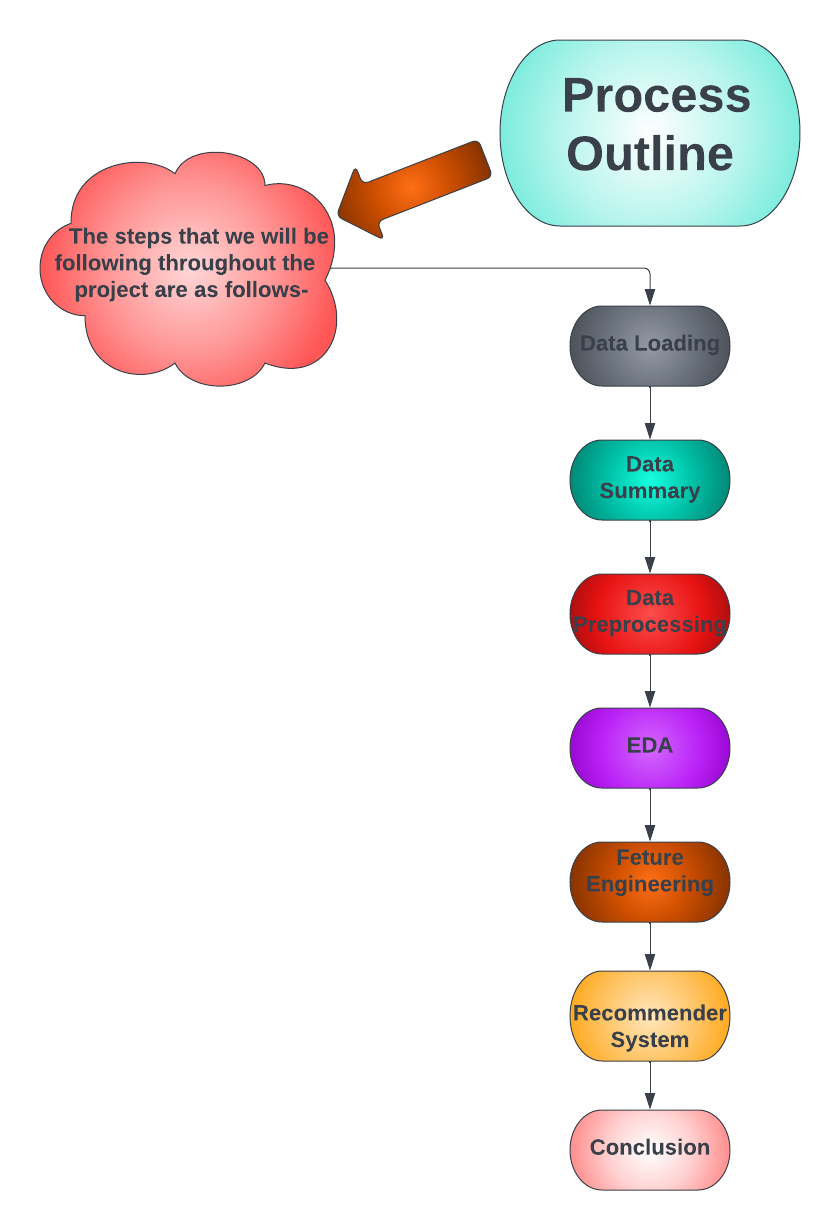

# Data Loading


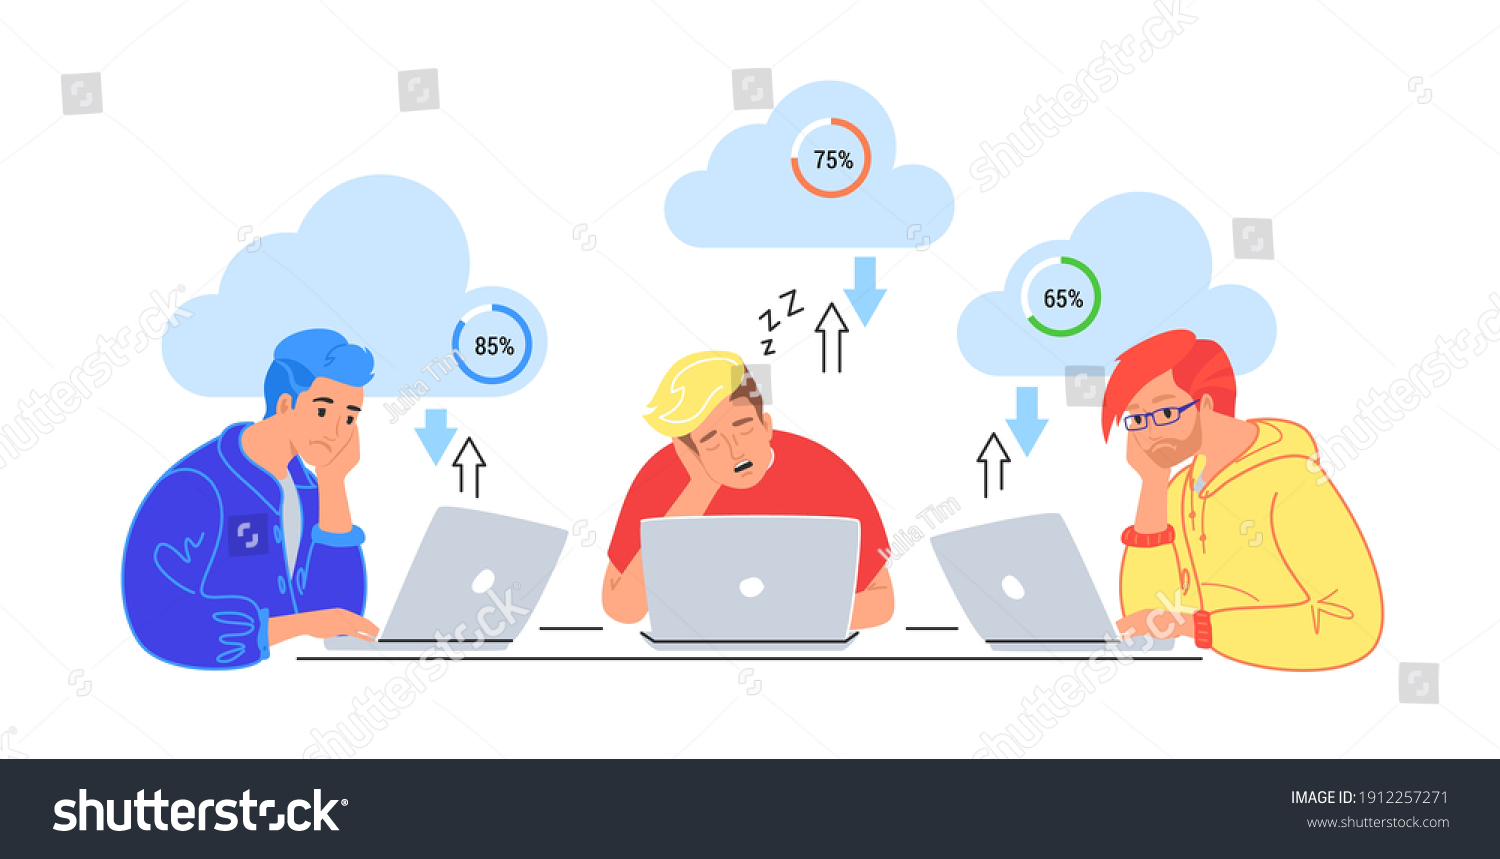

For data loading,we have to follow two steps--
* Mount our drive and 
* Uplopad the dataset 

Since Our drive is already mounted so lets upload the dataset.

 We are having three dataset--
 * Books
 * Ratings
 * Users

Lets upload the dataset one by one and do the operations.We will first upload books dataset.

In [ ]:
# Lets import first dataset that is books dataset 
books=pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Books.csv')

### Book's dataset Manipulation

In [ ]:
# lets check the shape of the dataset
books.shape

(271360, 8)

So,our dataset has 271360 rows and 8 columns.Lets check the different columns of our dataset.

In [ ]:
# Lets check the different coluns of our dataset
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

So, the different columns of our books  dataset are--
* ISBN (It is the unique number for different books)
* Book-Title (It is the title of the books)
* Book-Author (The author of the book)
* Year-Of-Publication (It is the year when book was published)
* Publisher (It is the name of the publisher)
* Image-URL-S (It is URL of the books categorizing it as small)
* Image-URL-M (It is URL of the books categorizing it as medium)
* Image-URL-L (It is URL of the books categorizing it as large)



In [ ]:
# lets check our data from above and below 
books

ISBN  ...                                        Image-URL-L
0       0195153448  ...  http://images.amazon.com/images/P/0195153448.0...
1       0002005018  ...  http://images.amazon.com/images/P/0002005018.0...
2       0060973129  ...  http://images.amazon.com/images/P/0060973129.0...
3       0374157065  ...  http://images.amazon.com/images/P/0374157065.0...
4       0393045218  ...  http://images.amazon.com/images/P/0393045218.0...
...            ...  ...                                                ...
271355  0440400988  ...  http://images.amazon.com/images/P/0440400988.0...
271356  0525447644  ...  http://images.amazon.com/images/P/0525447644.0...
271357  006008667X  ...  http://images.amazon.com/images/P/006008667X.0...
271358  0192126040  ...  http://images.amazon.com/images/P/0192126040.0...
271359  0767409752  ...  http://images.amazon.com/images/P/0767409752.0...

[271360 rows x 8 columns]

In [ ]:
# lets check data type of dataset
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [ ]:
#checking unique values of different features of the books dataset
books.apply(lambda x: len(x.unique()))

ISBN                   271360
Book-Title             242135
Book-Author            102024
Year-Of-Publication    202   
Publisher              16808 
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271042
dtype: int64

So, we can see that all the features has many unique values.And Year of publication has minimum unique values.

Since Books are identified by their respective ISBN and Invalid ISBNs have already been removed from the dataset,lets check the unique values of different features of the books dataset.

In [ ]:
books['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [ ]:
books['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [ ]:
books['Image-URL-S'].unique()

array(['http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg',
       ...,
       'http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0767409752.01.THUMBZZZ.jpg'],
      dtype=object)

In [ ]:
books.Publisher.unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [ ]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Since,we can see that their are some values in Year-of-publication column like,'DK Publishing Inc','Gallimard','2024','2037','2030',2038, 2026,which could not be there in dataset so,we have to manipulate it before developing a recommender system.

In [ ]:
# lets check in how many rows are the year as DK Publishing inc
books.loc[books['Year-Of-Publication']=='DK Publishing Inc']

ISBN  ... Image-URL-L
209538  078946697X  ...         NaN
221678  0789466953  ...         NaN

[2 rows x 8 columns]

So, there are two rows in which the Year of Publication is as 'DK Publishing Inc'.We can see that the values are written at wrong places lets make it as correct place.

In [ ]:
# Lets correct the values of index number 209538 and 221678 
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = '2000'
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = '2000'
books.at[221687 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'


In [ ]:
# now lets check values of index 209538
books.loc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [ ]:
# now lets check values of index 221678
books.loc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

Great,we have corrected these values.

Now lets check in how many rows are year of publication as ,'Gallimard' 

In [ ]:
# Lets check in hiw many rows are the year of publicatiobn as gallimard
books.loc[books['Year-Of-Publication']=='Gallimard']

ISBN  ... Image-URL-L
220731  2070426769  ...         NaN

[1 rows x 8 columns]

So, we can see that in only one row there is year of publication as Gallimard.We can see that the values are written at wrong places.So lets write at its correct place.

In [ ]:
# lets coorect the values at index 220731
books.at[220731,'Book-Author']='Jean-Marie Gustave Le'
books.at[220731,'Book-Title']='Peuple du cel,suivi de les Bergers'
books.at[220731,'Publisher']='Gallimard'
books.at[220731,'Year-Of-Publication']='2003'

In [ ]:
# lets check the values of index 220731
books.loc[220731]

ISBN                                                          2070426769
Book-Title                            Peuple du cel,suivi de les Bergers
Book-Author                                        Jean-Marie Gustave Le
Year-Of-Publication                                                 2003
Publisher                                                      Gallimard
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

Great, we corrected this value as.

Now since we are living in 2022 so we have to remove values in which the year of opublication is greater than 2022.Lets do that--

In [ ]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [ ]:
# Lets print all the different values in year of publication column
print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
# lets check how many values of year of publication are greater than 2022 years
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   13
Book-Title             13
Book-Author            13
Year-Of-Publication    13
Publisher              13
Image-URL-S            13
Image-URL-M            13
Image-URL-L            13
dtype: int64

In [ ]:
books.loc[books['Year-Of-Publication']>2022]

ISBN  ...                                        Image-URL-L
37487   0671746103  ...  http://images.amazon.com/images/P/0671746103.0...
55676   0671791990  ...  http://images.amazon.com/images/P/0671791990.0...
78168   0870449842  ...  http://images.amazon.com/images/P/0870449842.0...
80264   0140301690  ...  http://images.amazon.com/images/P/0140301690.0...
97826   0140201092  ...  http://images.amazon.com/images/P/0140201092.0...
116053  0394701658  ...  http://images.amazon.com/images/P/0394701658.0...
118294  3442436893  ...  http://images.amazon.com/images/P/3442436893.0...
192993  0870446924  ...  http://images.amazon.com/images/P/0870446924.0...
228173  0671266500  ...  http://images.amazon.com/images/P/0671266500.0...
240169  0684718022  ...  http://images.amazon.com/images/P/0684718022.0...
246842  0380000059  ...  http://images.amazon.com/images/P/0380000059.0...
255409  068471809X  ...  http://images.amazon.com/images/P/068471809X.0...
260974  0671740989  ...  http://images.amazon.com/images/P/0671740989.0...

[13 rows x 8 columns]

In [ ]:
# lets check how many values of year of publication are equal to zero
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   4618
Book-Title             4618
Book-Author            4618
Year-Of-Publication    4618
Publisher              4618
Image-URL-S            4618
Image-URL-M            4618
Image-URL-L            4618
dtype: int64

In [ ]:
books.loc[books['Year-Of-Publication']==0]


ISBN  ...                                        Image-URL-L
176     3150000335  ...  http://images.amazon.com/images/P/3150000335.0...
188     342311360X  ...  http://images.amazon.com/images/P/342311360X.0...
288     0571197639  ...  http://images.amazon.com/images/P/0571197639.0...
351     3596214629  ...  http://images.amazon.com/images/P/3596214629.0...
542     8845229041  ...  http://images.amazon.com/images/P/8845229041.0...
...            ...  ...                                                ...
270794  014029953X  ...  http://images.amazon.com/images/P/014029953X.0...
270913  0340571187  ...  http://images.amazon.com/images/P/0340571187.0...
271094  8427201079  ...  http://images.amazon.com/images/P/8427201079.0...
271182  0887781721  ...  http://images.amazon.com/images/P/0887781721.0...
271196  3150013763  ...  http://images.amazon.com/images/P/3150013763.0...

[4618 rows x 8 columns]

So, we can see that there are 13 values which are greater than 2022 and 4618 values which are equal to zero in year of publication column which we have to treat before moving ahead.

In [ ]:
## Replacing Invalid years with max year
from collections import Counter
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [ ]:
# lets replace all values of year of publicaion which are greater than 2022 and equal to zero with maximum number of years
books.loc[books['Year-Of-Publication'] > 2022, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [ ]:
# now lets verify if there any value greater than 2022
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Great,there is no such values in year of publication column whose values are greater than 2022

In [ ]:
# similarly lets verfy if there and value equal to zero in year of publication column
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Great,there is no such values in year of publication column whose values are equal to zero.

Now Our Year of Publication column is good to operate to lets check for others.

Lets check is there any null values in books dataset.

In [ ]:
# checking null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Okay,so there is one null value in Book-Author,Two null values in Publisher and three null values in Image-URL-L columns.Lets check what are those null values--


In [ ]:
# checking null value in Book-Author column
books.loc[books['Book-Author'].isnull()]

ISBN  ...                                        Image-URL-L
187689  9627982032  ...  http://images.amazon.com/images/P/9627982032.0...

[1 rows x 8 columns]

So,we can see that there is one value in book author column which is NaN so lets replace it with 'Others'

In [ ]:
# lets replace nan value of book author with ohers 
books.at[187689 ,'Book-Author'] = 'Other'

In [ ]:
# lets check
books.loc[187689]

ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                                        Other
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            http://images.amazon.com/images/P/9627982032.0...
Image-URL-M            http://images.amazon.com/images/P/9627982032.0...
Image-URL-L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object

Great,we have replaced it.

Now lets check null values in Publisher column

In [ ]:
# checking null values in Publisher column
books.loc[books['Publisher'].isnull()]

ISBN  ...                                        Image-URL-L
128890  193169656X  ...  http://images.amazon.com/images/P/193169656X.0...
129037  1931696993  ...  http://images.amazon.com/images/P/1931696993.0...

[2 rows x 8 columns]

So, we can see that there are two null values in publisher column.Lets replace it with 'Others'

In [ ]:
# Lets replace null values of Publisher column with others
books.at[128890,'Publisher']='Others'
books.at[129037,'Publisher']='Others'

In [ ]:
# lets verify for first
books.loc[128890]

ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                         Others
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object

In [ ]:
# lets verify for second
books.loc[129037]

ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                         Others
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object

Great,we have transformed this values as well.Lets now proceecd for Image URL L column

In [ ]:
# checking null value in Image-URL-L column
books.loc[books['Image-URL-L'].isnull()]

ISBN  ... Image-URL-L
209538  078946697X  ...         NaN
220731  2070426769  ...         NaN
221678  0789466953  ...         NaN

[3 rows x 8 columns]

Since we will not be doing much with image url columns so lets drop it.

In [ ]:
## Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  
0    Mark P. O. Morford                 2002     Oxford University Press  
1  Richard Bruce Wright                 2001       HarperFlamingo Canada  
2          Carlo D'Este                 1991             HarperPerennial  
3      Gina Bari Kolata                 1999        Farrar Straus Giroux  
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company

In [ ]:
# lets check is there anynull values
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


Great we have manipulated our books data.

Now its time to upload our second dataset and manipulate it

Uploading second dataset which is user dataset

In [ ]:
# Uploading second dataset
user=pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Users.csv')

### User's dataset Manipulation

In [ ]:
# lets check shape of user dataset
user.shape

(278858, 3)

Great,there are 278858 rows and 3 clumns in our user dataset.

In [ ]:
# lets check the columns in user dataset
user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

So, the different columns in user dataset are as follows--
* User-ID
* location
* Age

In [ ]:
# lets check user dataset from above and below
user

User-ID                            Location   Age
0             1                  nyc, new york, usa   NaN
1             2           stockton, california, usa  18.0
2             3     moscow, yukon territory, russia   NaN
3             4           porto, v.n.gaia, portugal  17.0
4             5  farnborough, hants, united kingdom   NaN
...         ...                                 ...   ...
278853   278854               portland, oregon, usa   NaN
278854   278855  tacoma, washington, united kingdom  50.0
278855   278856           brampton, ontario, canada   NaN
278856   278857           knoxville, tennessee, usa   NaN
278857   278858                dublin, n/a, ireland   NaN

[278858 rows x 3 columns]

In [ ]:
# lets check datatype
user.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [ ]:
#checking unique values of different features of the user dataset
user.apply(lambda x: len(x.unique()))

User-ID     278858
Location     57339
Age            166
dtype: int64

Since everyone of them have unique user-Id, and different locations so we cannot do much with it.So,lets check age columns 

In [ ]:
# lets check unique values in age 
user.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

So, we can see that there is nan values and some values are there which could not be there in dataset such as age greater than 90 and less than 6 because peoples greater than 90 and less 6 years of age do not read books.So we have to remove these values. 

In [ ]:
# lets check how many values are less than or equal to 6 years 
user[user['Age']<6].count()

User-ID     908
Location    908
Age         908
dtype: int64

In [ ]:
# lts check how many values are greater than 90
user[user['Age']>90].count()

User-ID     430
Location    430
Age         430
dtype: int64

So,there are 926 age values which are less or equal to 6 years of age and 430 values which are greater than or equal to 90 years of age.Since these are absurd values so we have to manipulate it.Lets change these values with mean age values.

In [ ]:
# lets create a variable for required age group
required = user[user['Age'] <= 90]
required = required[required['Age'] >= 6]

In [ ]:
# lets check the mean age
mean = round(required['Age'].mean())   
mean

35

So,35 years is the mean age lets replace absurd values with mean age.


In [ ]:
# Lets replace the values
user.loc[user['Age'] > 90, 'Age'] = mean    #outliers with age grater than 90 are substituted with mean 
user.loc[user['Age'] < 6, 'Age'] = mean    #outliers with age less than 6 years are substitued with mean
user['Age'] = user['Age'].fillna(mean)      #filling null values with mean
user['Age'] = user['Age'].astype(int)       #changing Datatype to int

In [ ]:
# lets verify for age group equal to or less than 6 years
user[user['Age']<6].count()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
# lets verify for age group greater thsn 90 years
user[user['Age']>90].count()

User-ID     0
Location    0
Age         0
dtype: int64

Great, we have filled that values with mean values

Let's find our unique value in Location column.

In [ ]:
# lets see the unique values of location
user.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
# lets find the total unique values in location
user.Location.nunique()

57339

In [ ]:
# Extracting  city state and country from location column

list_ = user.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
user = user.drop('Location',axis=1)
temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

user = pd.concat([user, df_city], axis=1)
user = pd.concat([user, df_state], axis=1)
user = pd.concat([user, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [ ]:
# now lets check how our data looks
user.head()

User-ID  Age         City            State         Country
0        1   35          nyc         new york             usa
1        2   18     stockton       california             usa
2        3   35       moscow  yukon territory          russia
3        4   17        porto         v.n.gaia        portugal
4        5   35  farnborough            hants  united kingdom

In [ ]:
# lets check is there any null values
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int64 
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int64(2), object(3)
memory usage: 10.6+ MB


So,there is no null values

Now its time to upload our third dataset (Rating Dataset) and manipulate it

Lets upload the third dataset 

In [ ]:
# lets upload the rating dataset
rating=pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Ratings.csv')

# Rating's Dataset Manipulation

In [ ]:
# lets check the shape of rating dataset
rating.shape

(1149780, 3)

So,there are 1149780 rows and 3 columns in rating dataset.Lets see the different columns present in rating dataset and manipulate it.

In [ ]:
# lets see the different columns in rating dataset
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

So,the different columns in our rating dataset are--
* User-Id
* ISBN
* Book-Rating


Rating dataset should have books only which exist in our books dataset.

In [ ]:
# lets take that rating of books which are in books dataset
rating = rating[rating.ISBN.isin(books.ISBN)]
rating.shape

(1031136, 3)

In [ ]:
# lets see our dataset look from above and below
rating

User-ID        ISBN  Book-Rating
0         276725  034545104X            0
1         276726  0155061224            5
2         276727  0446520802            0
3         276729  052165615X            3
4         276729  0521795028            6
...          ...         ...          ...
1149774   276704  0876044011            0
1149775   276704  1563526298            9
1149776   276706  0679447156            0
1149777   276709  0515107662           10
1149778   276721  0590442449           10

[1031136 rows x 3 columns]

Since the User-Id and ISBN number of the dataset is unique,therefore lets see the unique values in Book-Rating column.

In [ ]:
# Renaming feature name
rating.rename(columns={'Book-Rating':'rating'},inplace=True)

In [ ]:
# lets see unique values in rating column
rating['rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

In [ ]:
# lets count the different ratings 
rating['rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: rating, dtype: int64

So, we can see that Book-Rating is ranging from 0 to 10.Since here our dataset is already cleaned so we do not need to clean it. We are good to go. 

From above, it is obvious that the ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets is important. So, lets seprate the rating into explicit and implicit.

In [ ]:
# Hence segragating implicit and explict ratings datasets
rating_explicit = rating[rating['rating'] != 0]
rating_implicit = rating[rating['rating'] == 0]

In [ ]:
# lets print it
print('rating_explicit dataset shape',rating_explicit.shape)
print('rating_implicit dataset',rating_implicit.shape)

rating_explicit dataset shape (383842, 3)
rating_implicit dataset (647294, 3)


We have preprocessed all the three datasets sucessfully.So,lets proceed--

In [ ]:
# lets check is there any null value
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1031136 non-null  int64 
 1   ISBN     1031136 non-null  object
 2   rating   1031136 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


So,there is no null values.

## Observation
After looking all the three datasets and manipulating the datasets, I have made the following observations--


# Merging All Data
Lets merge all the three datasets to work simultaneously on all three of them.

In [ ]:
 # Create column Rating average 
rating_explicit['Avg_Rating']=rating_explicit.groupby('ISBN')['rating'].transform('mean')
# Create column Rating sum
rating_explicit['Total_No_Of_Users_Rated']=rating_explicit.groupby('ISBN')['rating'].transform('count')

In [ ]:
 # merging data set
merged_data = pd.merge(books, rating_explicit, on='ISBN', how='inner')
merged_data = pd.merge(merged_data, user, on='User-ID', how='inner')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ISBN                     383842 non-null  object 
 1   Book-Title               383842 non-null  object 
 2   Book-Author              383842 non-null  object 
 3   Year-Of-Publication      383842 non-null  int64  
 4   Publisher                383842 non-null  object 
 5   User-ID                  383842 non-null  int64  
 6   rating                   383842 non-null  int64  
 7   Avg_Rating               383842 non-null  float64
 8   Total_No_Of_Users_Rated  383842 non-null  int64  
 9   Age                      383842 non-null  int64  
 10  City                     383842 non-null  object 
 11  State                    383842 non-null  object 
 12  Country                  383842 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 41.0+ MB


In [ ]:
# lets see our merged data
merged_data

ISBN                                         Book-Title  \
0       0002005018                                       Clara Callan   
1       074322678X            Where You'll Find Me: And Other Stories   
2       0887841740                                 The Middle Stories   
3       1552041778                                           Jane Doe   
4       1567407781       The Witchfinder (Amos Walker Mystery Series)   
...            ...                                                ...   
383837  8441407487  Sobre La Utilidad y Los Perjuicios de La Historia   
383838  087004124X                                             Anthem   
383839  158243123X                               A Student of Weather   
383840  8485900057            Rimas y leyendas (ClÃ¡sicos Fraile ; 3)   
383841  0838934854                   Anglo-American Cataloguing Rules   

                        Book-Author  Year-Of-Publication  \
0              Richard Bruce Wright                 2001   
1                       Ann Beattie                 2002   
2                       Sheila Heti                 2004   
3                      R. J. Kaiser                 1999   
4                 Loren D. Estleman                 1998   
...                             ...                  ...   
383837  Friedrich Wilhelm Nietzsche                 2000   
383838                     Ayn Rand                 1966   
383839                Elizabeth Hay                 2001   
383840      Gustavo Adolfo BÃ©cquer                 1981   
383841               Michael Gorman                 1998   

                           Publisher  User-ID  rating  Avg_Rating  \
0              HarperFlamingo Canada        8       5    7.666667   
1                           Scribner        8       5    5.000000   
2              House of Anansi Press        8       5    5.000000   
3                         Mira Books        8       5    5.000000   
4           Brilliance Audio - Trade        8       6    6.000000   
...                              ...      ...     ...         ...   
383837                          Edaf   246590       6    6.000000   
383838                  Caxton Press   259589       8    8.000000   
383839            Counterpoint Press   259591       8    8.000000   
383840              Ediciones Fraile   259614      10   10.000000   
383841  American Library Association   259679       6    6.000000   

        Total_No_Of_Users_Rated  Age           City         State Country  
0                             9   35        timmins       ontario  canada  
1                             1   35        timmins       ontario  canada  
2                             1   35        timmins       ontario  canada  
3                             1   35        timmins       ontario  canada  
4                             1   35        timmins       ontario  canada  
...                         ...  ...            ...           ...     ...  
383837                        1   20         madrid        madrid   spain  
383838                        1   19         venice       florida     usa  
383839                        1   39          tioga  pennsylvania     usa  
383840                        1   22         madrid        madrid   spain  
383841                        1   27  grand prairie         texas     usa  

[383842 rows x 13 columns]

In [ ]:
# lets check shape of our merged data
merged_data.shape

(383842, 13)

In [ ]:
# lets check the different columns in our merged data
merged_data.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'User-ID', 'rating', 'Avg_Rating', 'Total_No_Of_Users_Rated', 'Age',
       'City', 'State', 'Country'],
      dtype='object')

So, now we are having nine columns

Creating bins for the age column.

In [ ]:
# Create age groups using age column
bins = [-1,12,20,50,100]
labels = ['Kid','Teenager','Adult','Old']
merged_data['age_bins'] = pd.cut(x=merged_data['Age'], bins=bins,labels=labels)

* Labelled 'Kid' for values between between 1-12.
* 'Teenager' for values between 13-19.
* 'Adult' for values between 20-50.
* 'Old' for values greater than 50.

# EDA(Exploratory Data Analysis)

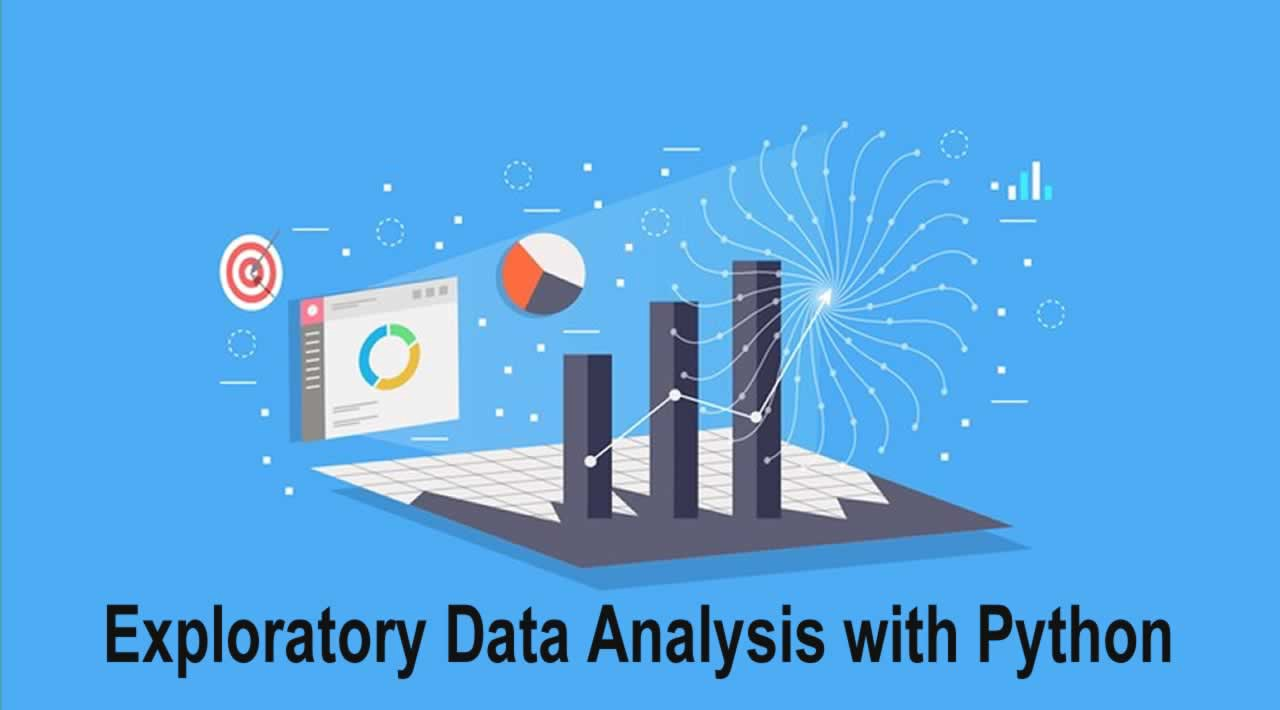

#### **1.) Ratings Count**

In [ ]:
ratings_explicit= merged_data[merged_data['Book-Rating'] != 0]
ratings_implicit= merged_data[merged_data['Book-Rating'] == 0]

A.) Explicit+Implicit Ratings

In [ ]:
# lets create rating_count variable
rating_count=rating['Book-Rating'].value_counts().reset_index().sort_values('Book-Rating',ascending=False)

Text(0.5, 1.0, 'Ratings Count')

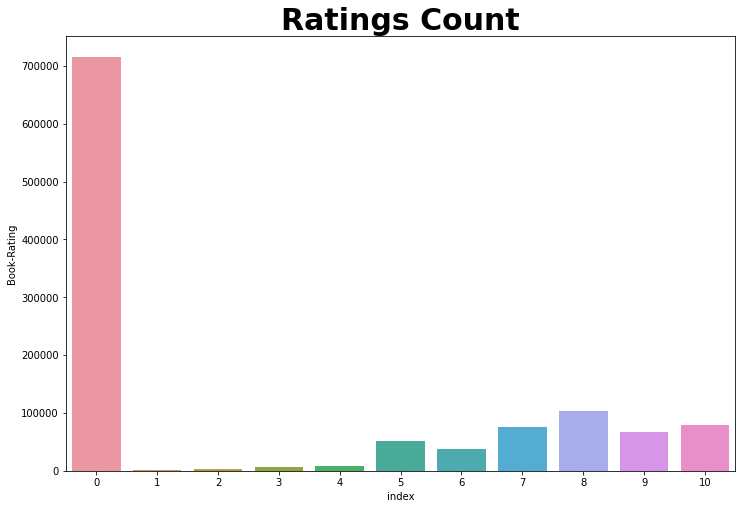

In [ ]:
# lets plot bar graph for it
plt.figure(figsize=(12,8))
ax=sns.barplot(rating_count['index'],rating_count['Book-Rating'])
ax.set_title('Ratings Count',fontsize=30,fontweight='bold')

**Conclusion**: The datset with both explicit and implicit ratings is highly skewed toward the value of zero.

B.) Explicit Ratings

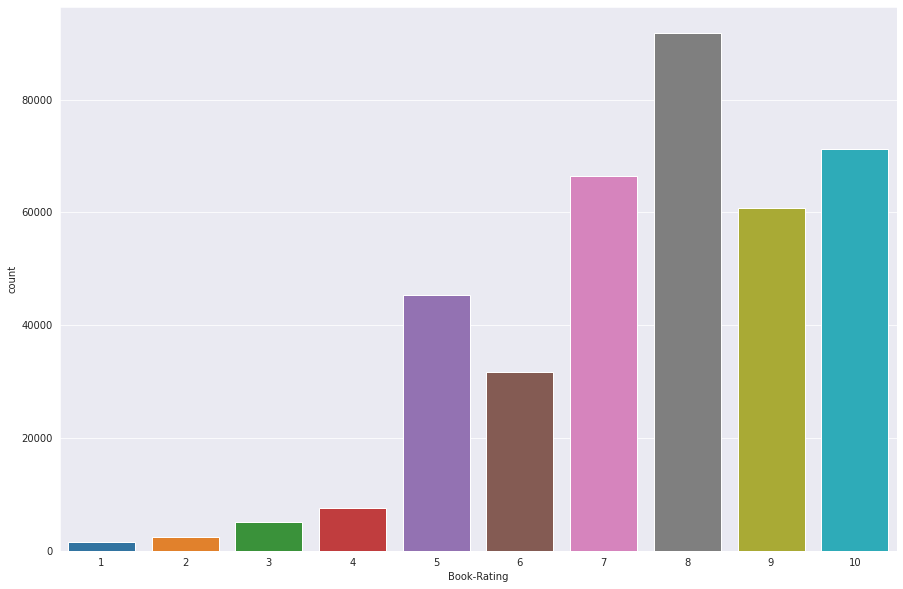

In [ ]:
# Lets plot graph for it
fig = plt.figure(figsize =(15,10))
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='Book-Rating') 
ax.set_title('Ratings-Density Plot', weight='bold').set_fontsize('25')
plt.show()

**Conclusion:** The skewness perishes after we remove the implicit ratings.

**2. Author V/S Ratings**

In [ ]:
# ratings count per author
auth_rating=merged_data.groupby(['Book-Author'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

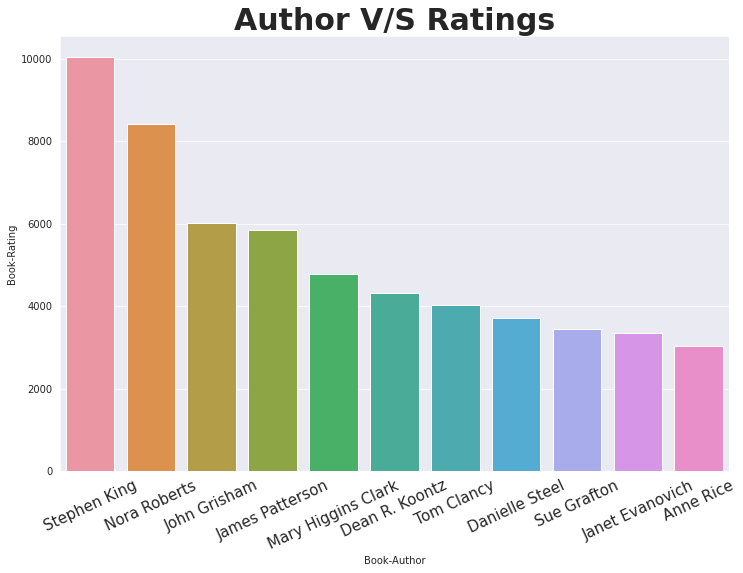

In [ ]:
# lets plot bar graph for it 
plt.figure(figsize=(12,8))
ax=sns.barplot(auth_rating[auth_rating['Book-Rating']>3000]['Book-Author'],auth_rating[auth_rating['Book-Rating']>3000]['Book-Rating'])
ax.set_title('Author V/S Ratings', fontsize=30,fontweight='bold')
plt.xticks(fontsize=15,rotation=25)

 * Here, we can observe, most frequently rated Authors.
 * Most frequently rated author is Nora Roberts, followed by Stephen King

**3. Book Ratings Count**

In [ ]:
#Book ratings count using group by
book_rating=merged_data.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).reset_index()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text major ticklabel objects>)

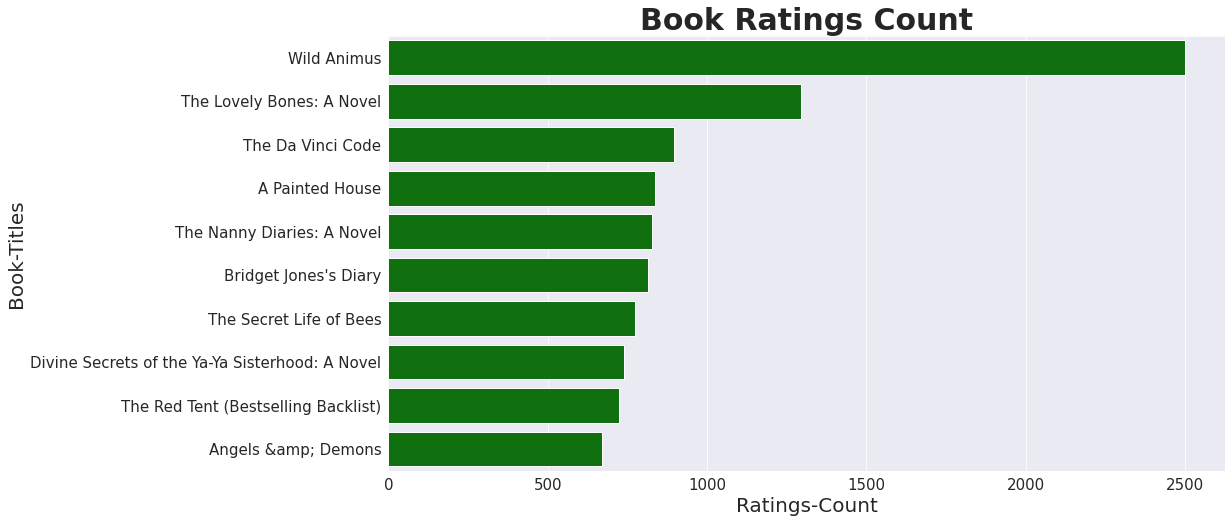

In [ ]:
# lets plot the graph for it
plt.figure(figsize=(15,8))
ax=sns.barplot(book_rating['Book-Rating'][:10],book_rating['Book-Title'][:10],color='g')
ax.set_title('Book Ratings Count', fontsize=30,fontweight='bold')
ax.set_xlabel('Ratings-Count',fontsize=20)
ax.set_ylabel('Book-Titles',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

*  Here, we are able to observe, most frequently rated books by the users.
*  Most frequently rated book, happens to be Wild Animus.

**4. Location**

In [ ]:
#Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(user.Country.value_counts(normalize=True)).reset_index()
df_location.columns = ['countries','value_counts']

#Labeling countries with low customer % as other
df_location['countries'] = df_location.apply(lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],axis=1)

#Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()

In [ ]:
#Every country has now just one occurance
df_location.countries.value_counts()

australia         1
canada            1
france            1
germany           1
italy             1
netherlands       1
new zealand       1
other             1
portugal          1
spain             1
united kingdom    1
usa               1
Name: countries, dtype: int64

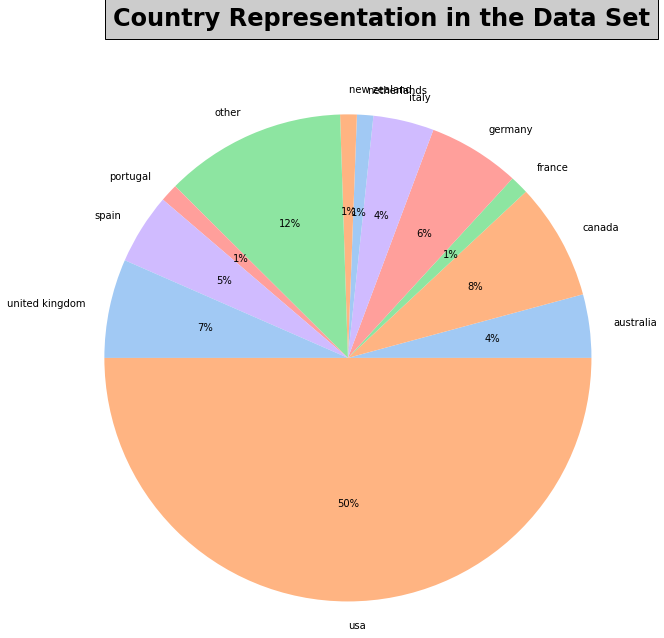

In [ ]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(15,8))
plt.title("Country Representation in the Data Set",bbox={'facecolor':'0.8', 'pad':8},fontsize=24, fontdict={"weight": "bold"},y=1.25,x=0.578)
f = plt.pie(df_location['value_counts'], labels = df_location['countries'], colors = colors, autopct='%.0f%%',radius=1.4)


* Most customers are from United states of America, followd by Canada, United Kingdom and Germany.
* Countries with less than 1% customers are labeled as other

**4. Age vs Rating Density**

In [ ]:
# Calculating the rating count and mean rating given to each book by the user.

rating_count = merged_data.groupby('Book-Title')['Book-Rating'].count().to_frame()
rating_mean = merged_data.groupby('Book-Title')['Book-Rating'].mean().to_frame()

In [ ]:
# Renaming the column names before merging them with the final dataset.

rating_count.rename(columns={'Book-Rating':'Rating-Count'}, inplace=True)
rating_mean.rename(columns={'Book-Rating':'Rating-Mean'}, inplace=True)

In [ ]:
merged_data = pd.merge(merged_data, rating_count, on='Book-Title', how='inner')
merged_data = pd.merge(merged_data, rating_mean, on='Book-Title', how='inner')

In [ ]:
# rounding off the rating mean feature to 2 decimal points
merged_data['Rating-Mean'] = merged_data['Rating-Mean'].round(2)

In [ ]:
# Calculating the mean vote across the whole df
C = merged_data['Rating-Mean'].mean()

In [ ]:
# Calculating the minimum votes required to be listed in the top 5%
m = rating_count.quantile(.95)[0]

In [ ]:
# IMDB formula; source: https://tutorialedge.net/python/building-imdb-top-250-clone-pandas/
def weighted_rating(x, m=m, C=C):
    v = x['Rating-Count']
    R = x['Rating-Mean']

    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
df_merged_updated=merged_data[merged_data['Book-Rating']!=0]

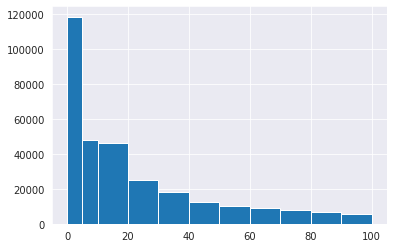

In [ ]:
# Visualizing the rating counts of the users. 
df_merged_updated['Rating-Count'].hist(bins=[0,5,10,20,30,40,50,60,70,80,90,100])

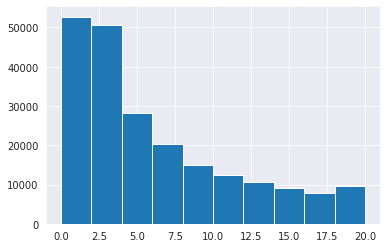

In [ ]:
# Visualizing the rating counts of the users in the range between 0 to 20. 
df_merged_updated['Rating-Count'].hist(bins=[0,2,4,6,8,10,12,14,16,18,20])

From this visualization it is evident that most books have been rated by 2 to 5 users only.

**5. Age Bin Representation**

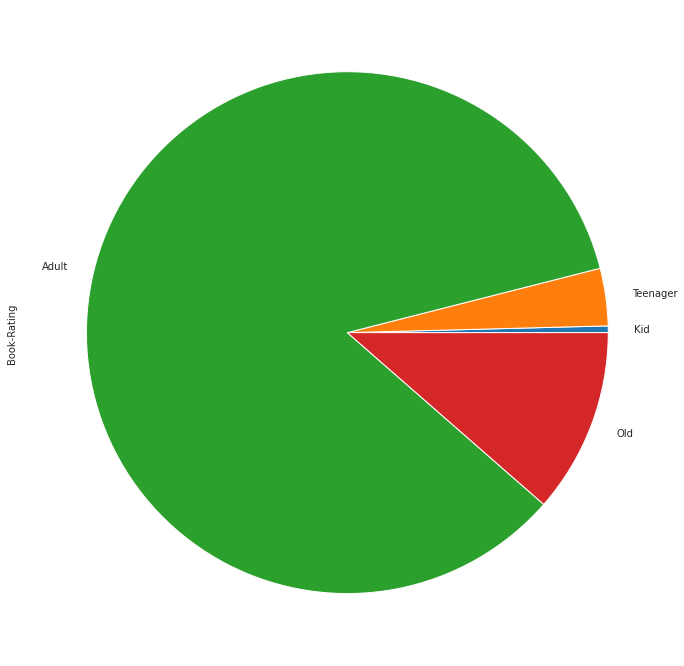

In [ ]:
# Age group that rated books the most
plt.figure(figsize=(20,12))
merged_data.groupby('age_bins')['Book-Rating'].count().plot(kind='pie')

* Most customers are Adults (20-50yrs).
* 2nd most represented age group is for boomers (>50yrs).

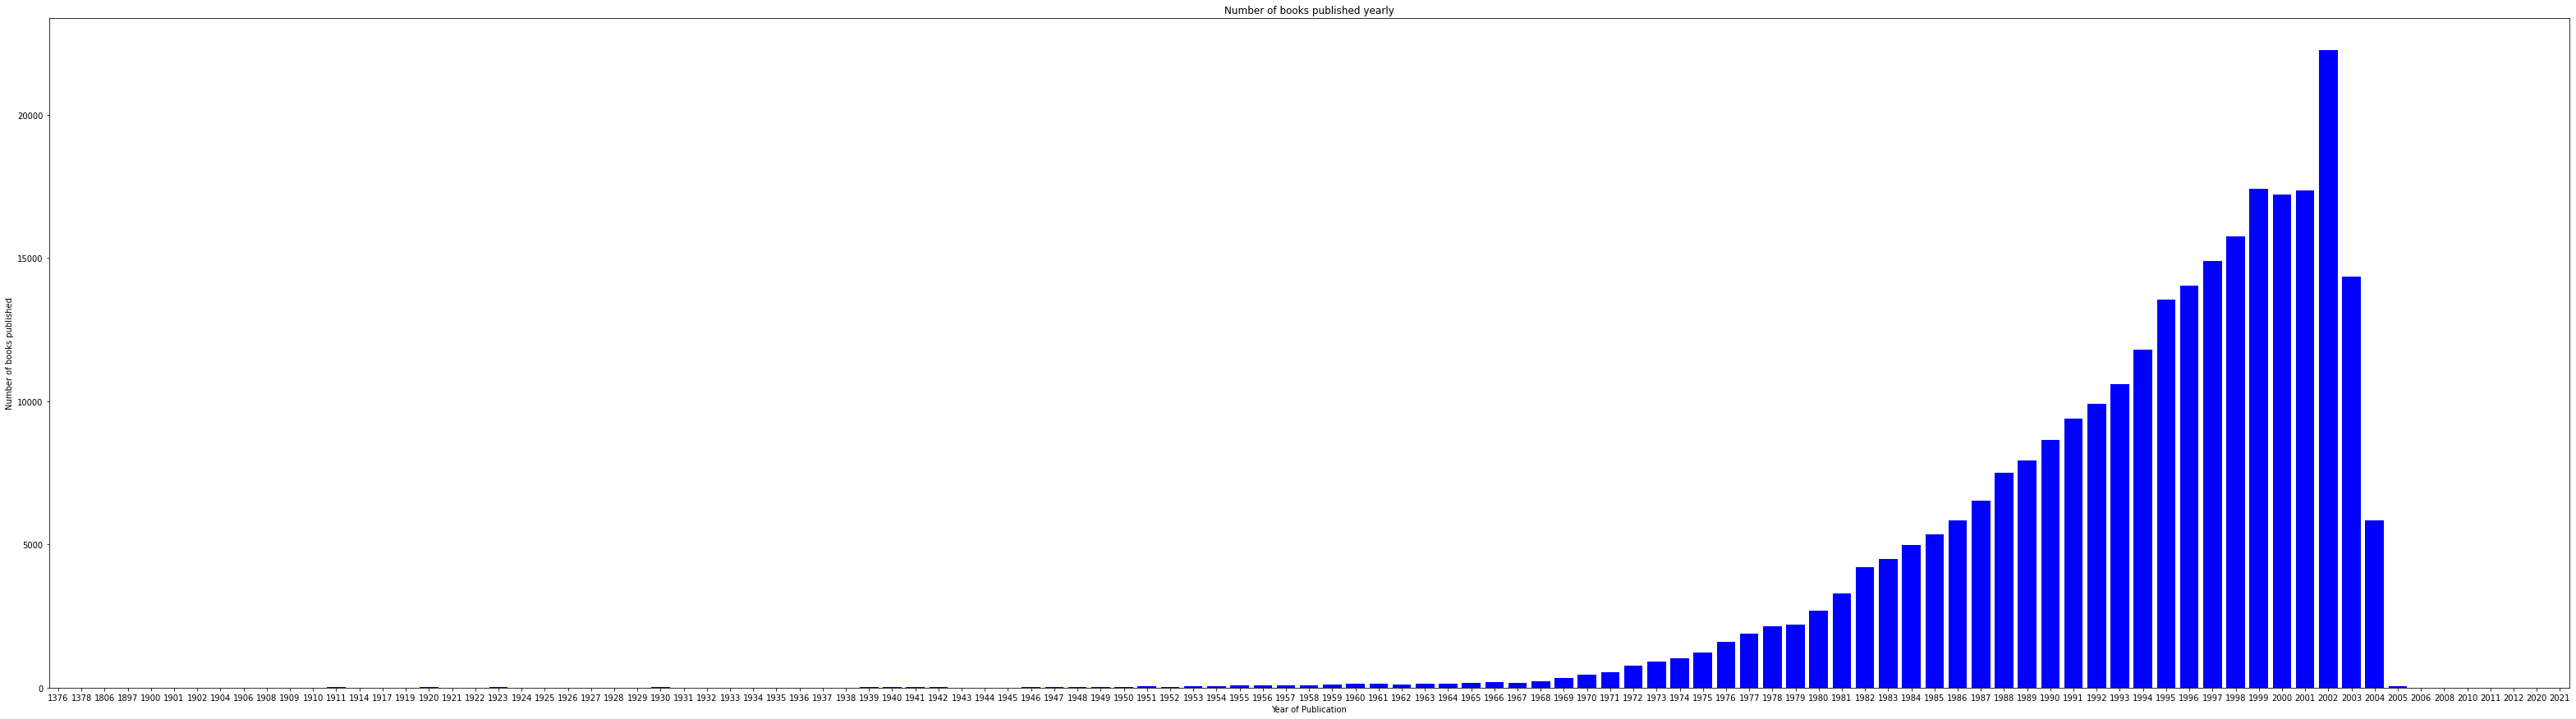

In [ ]:
# Lets plot bar graph for number of books published in different years
publications = {}
for year in books['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

Text(0.5, 1.0, 'No of books by an author (Top 20)')

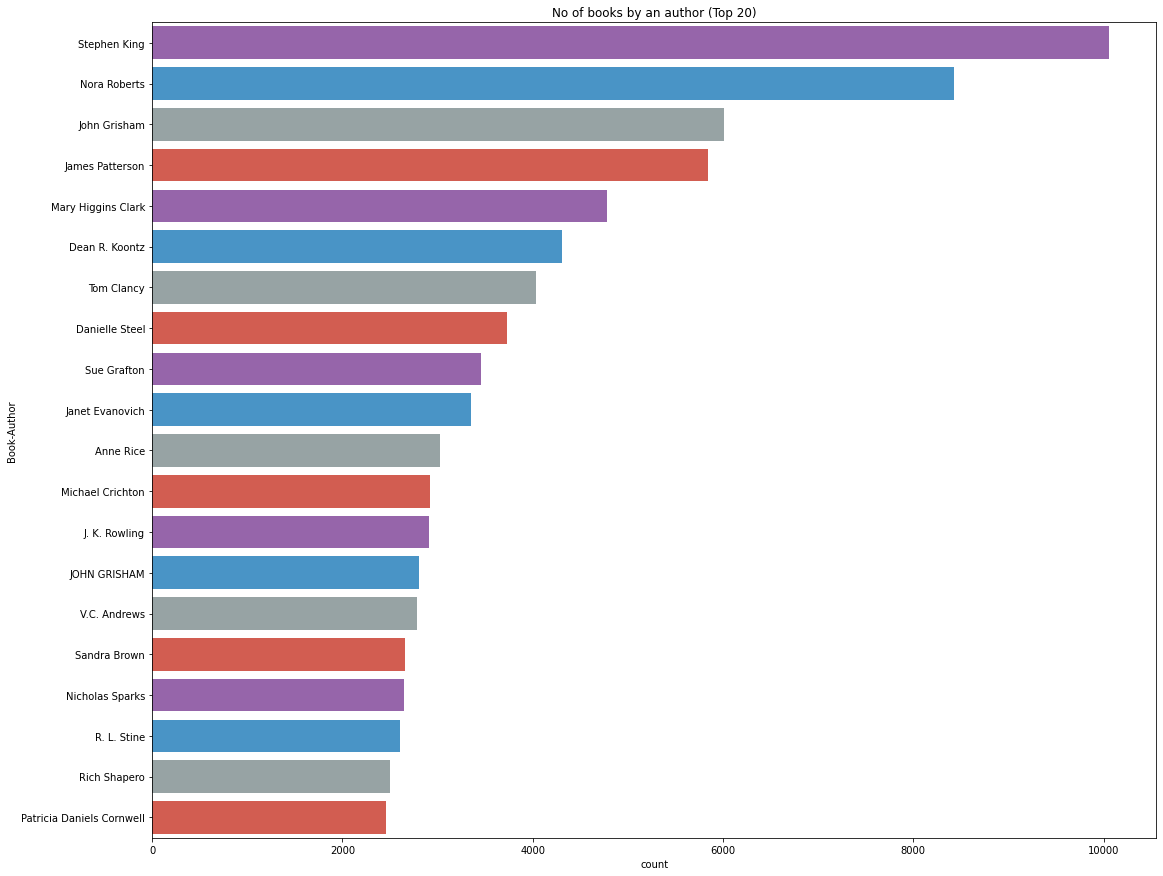

In [ ]:
# lets plot graph for top 20 books by authors
plt.figure(figsize=(18,15))
sns.countplot(y="Book-Author", data=merged_data,order=merged_data['Book-Author'].value_counts().index[0:20],palette=["#9b59b6", "#3498db", "#95a5a6", "#e74c3c"])
plt.title("No of books by an author (Top 20)")

Text(0.5, 1.0, 'No of books by a publisher (Top 20)')

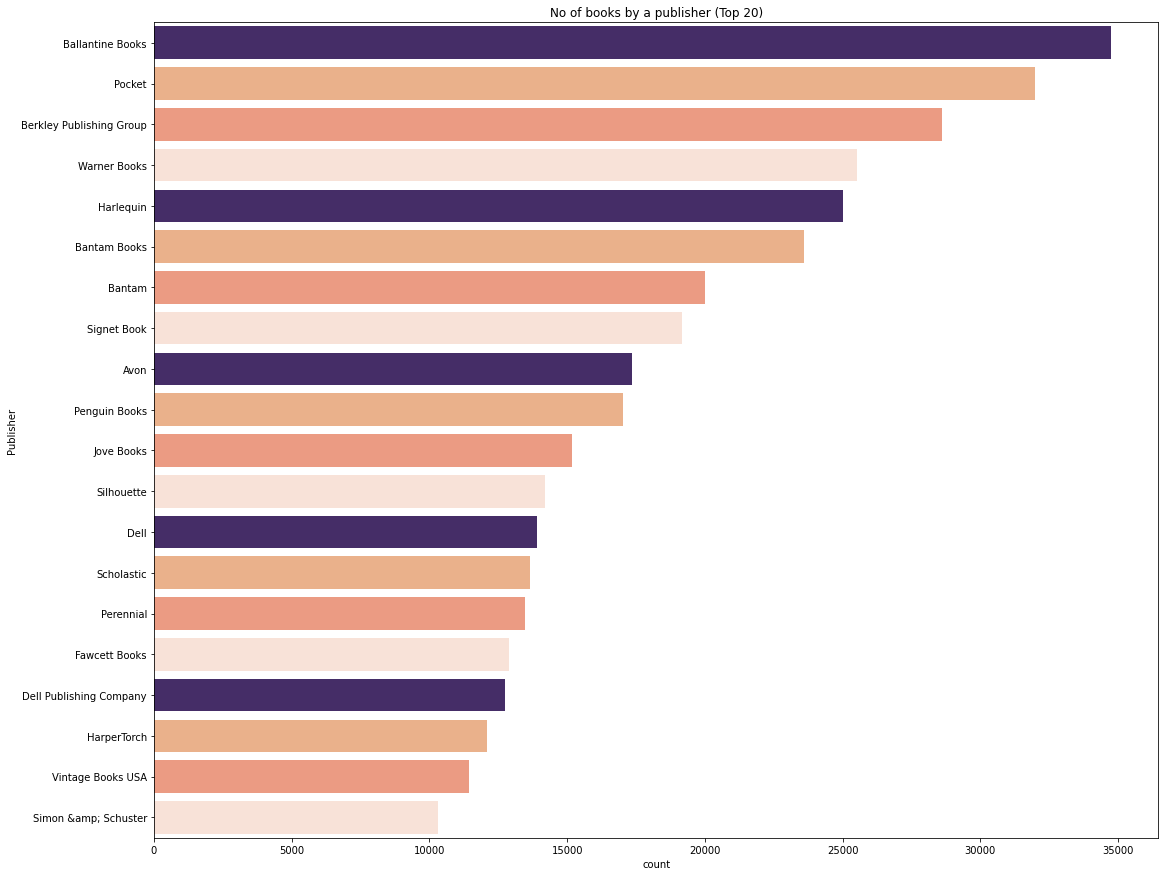

In [ ]:
# lets plot graph for top 20 books by publishers
plt.figure(figsize=(18,15))
sns.countplot(y="Publisher", data=merged_data,order=merged_data['Publisher'].value_counts().index[0:20],palette=['#432371',"#FAAE7B","#fc9272","#fee0d2",)
plt.title("No of books by a publisher (Top 20)")

In [ ]:
# lets define a function to calculate percentage of book rating
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

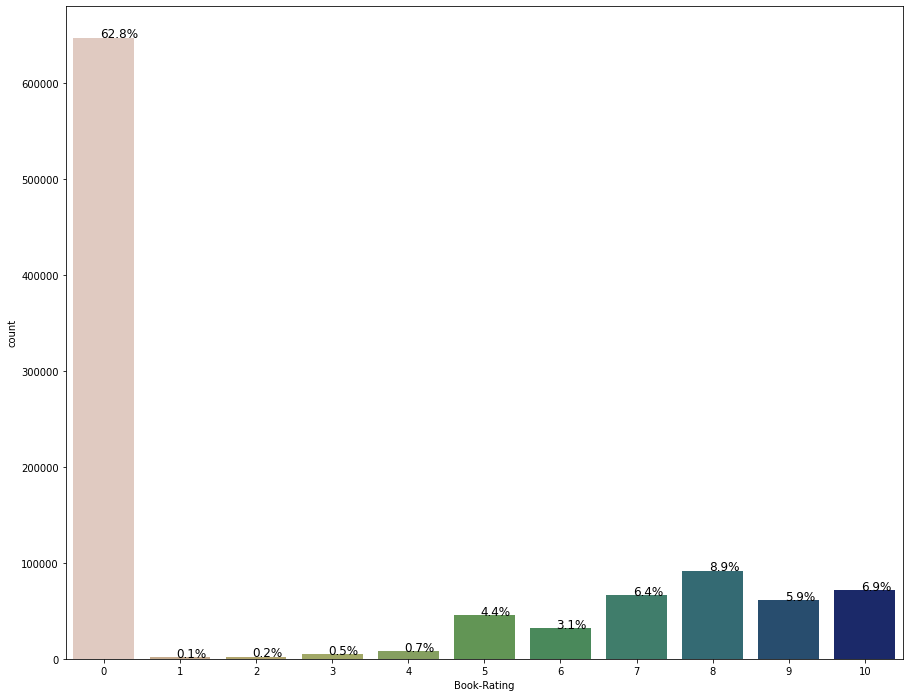

In [ ]:
# lets plot a bar graph for number of books of different ratings
plt.figure(figsize=(15,12))
ax=sns.countplot(x="Book-Rating", data=merged_data,palette='gist_earth_r')
without_hue(ax,merged_data['Book-Rating'])

Text(0.5, 1.0, 'Pie Chart showing Book-Rating')

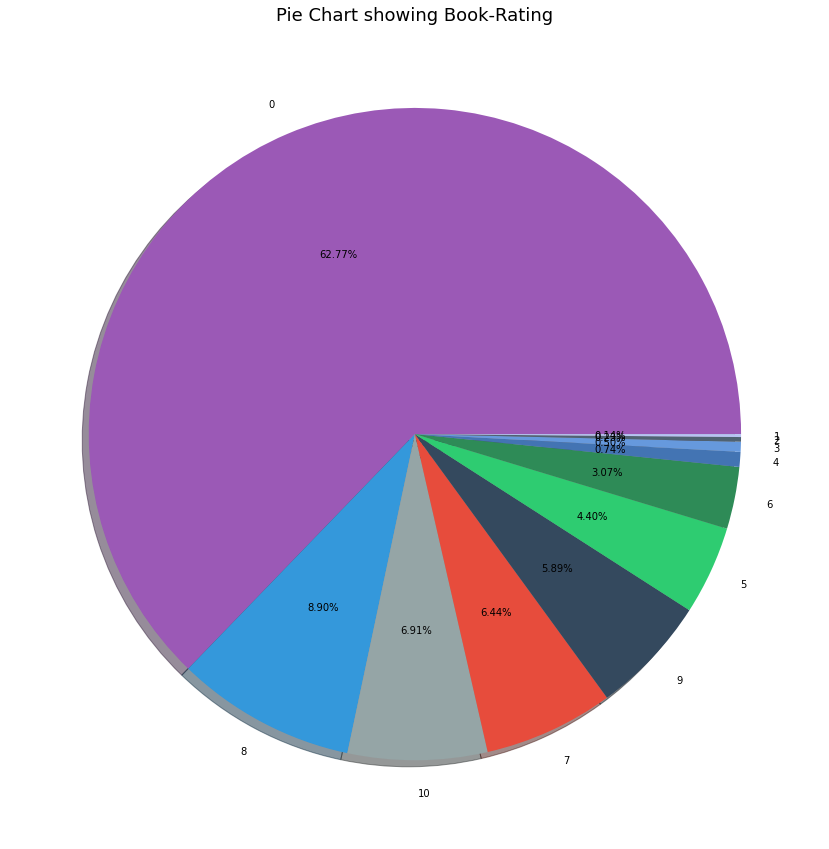

In [ ]:
# lets plot the pie graph explaining the percentage of Book rating
plt.figure(figsize = (15,15))
labels = [ 0, 8,10,7,9,5,6,4,3,2,1]
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c","#34495e", "#2ecc71",'seagreen', "#4374B3","#69d",'#4F6272', '#B7C3F3']
plt.pie(merged_data['Book-Rating'].value_counts(), labels =labels, autopct='%1.2f%%',colors=colors, shadow = True)
plt.title('Pie Chart showing Book-Rating', fontsize = 18)

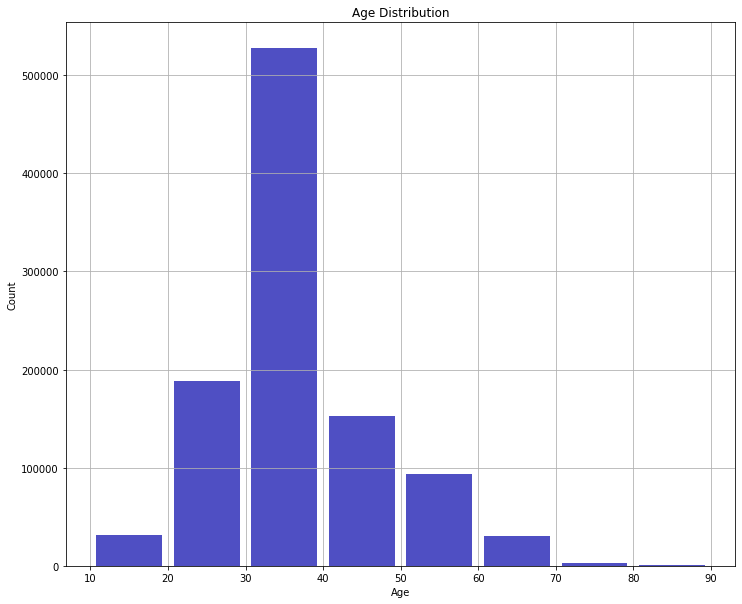

In [ ]:
# lets plot the age distribution
plt.figure(figsize=(12,10))
merged_data.Age.hist(bins=[10*i for i in range(1, 10)],color='#0504aa',alpha=0.7, rwidth=0.85)     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Average rating')

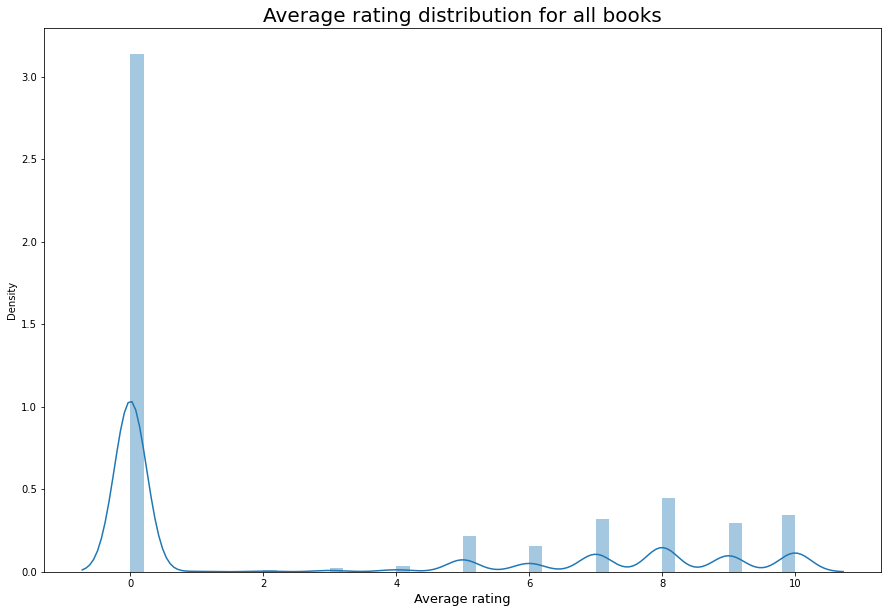

In [ ]:
fig, ax = plt.subplots(figsize=[15,10])
sns.distplot(merged_data['Book-Rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

# Recommendation Systems

 

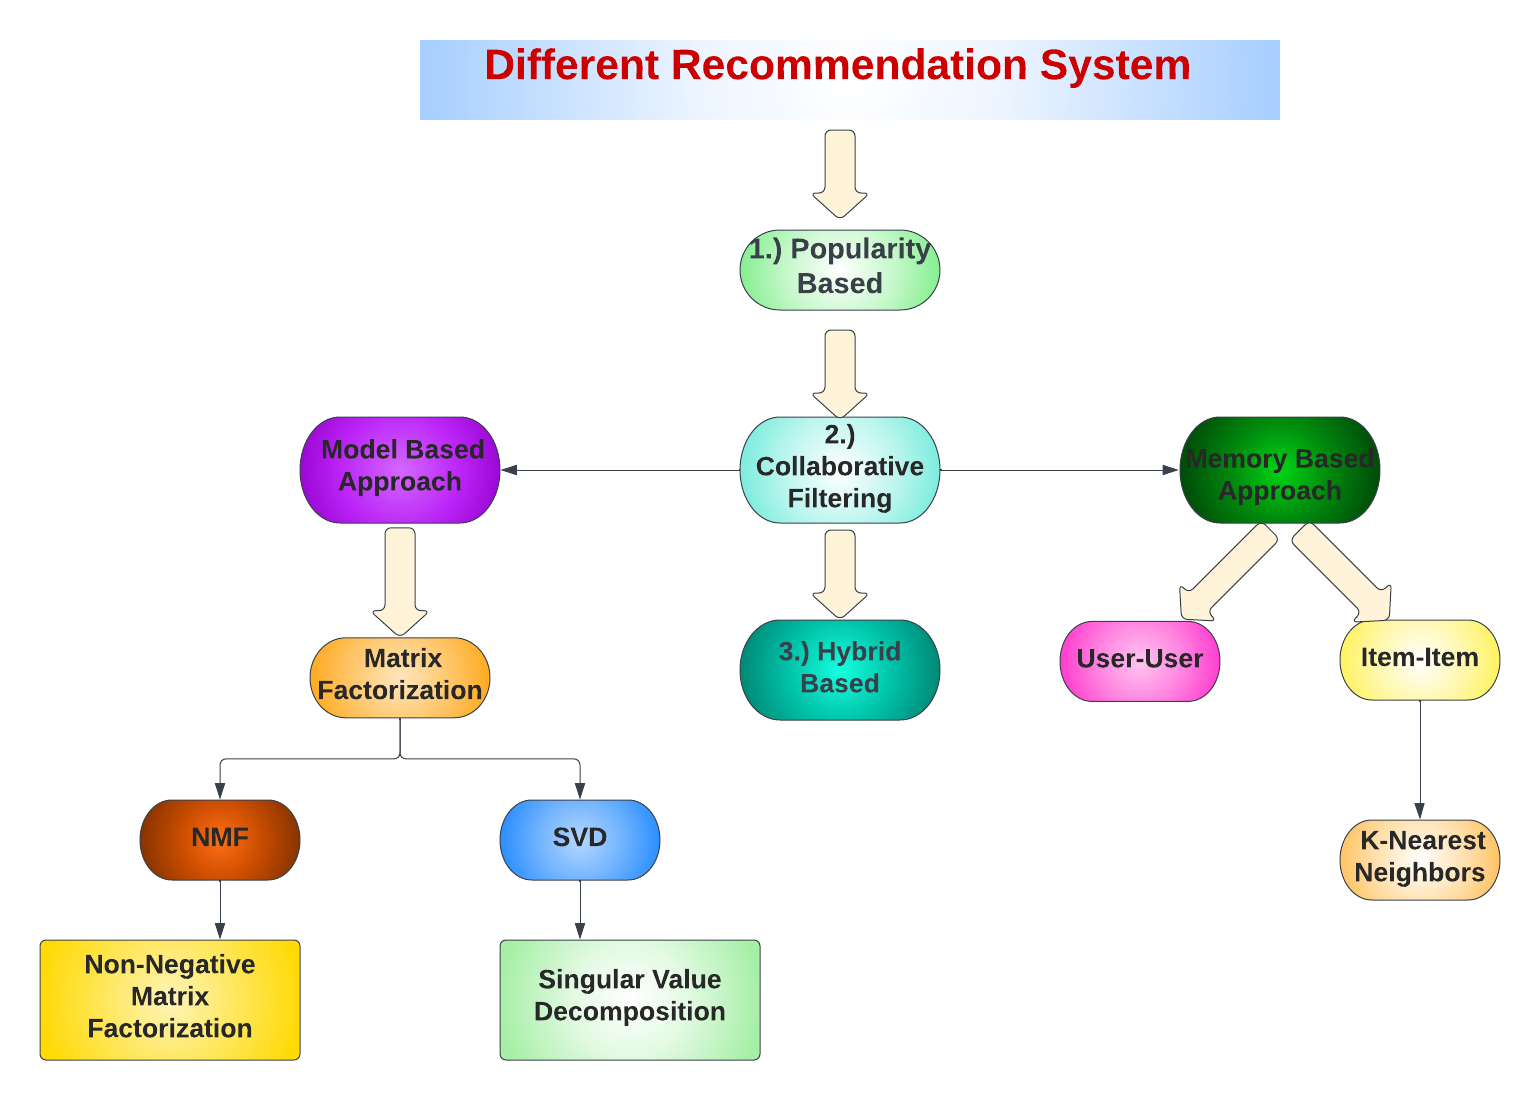

# 1.) Collaborative Filtering Based Recommendation system

Collaborative based filtering recommender systems are based on past interactions of users and target items. In simple words here, we try to search for the look-alike customers and offer products based on what his or her lookalike has chosen. Let us understand with an example. X and Y are two similar users and X user has watched A, B, and C movie. And Y user has watched B, C, and D movie then we will recommend A movie to Y user and D movie to X user. Youtube has shifted its recommendation system from content-based to Collaborative based filtering technique. If you have experienced sometimes there are also videos which not at all related to your history but then also it recommends it because the other person similar to you has watched it

* It is considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and makes recommendations.



                                         
 *  The similarity is not restricted to the taste of the user, moreover there can be consideration of similarity between different items also. The system will give more efficient recommendations if we have a large volume of information about users and items. There are various types of collaborative filtering techniques as mentioned in the diagram given below.

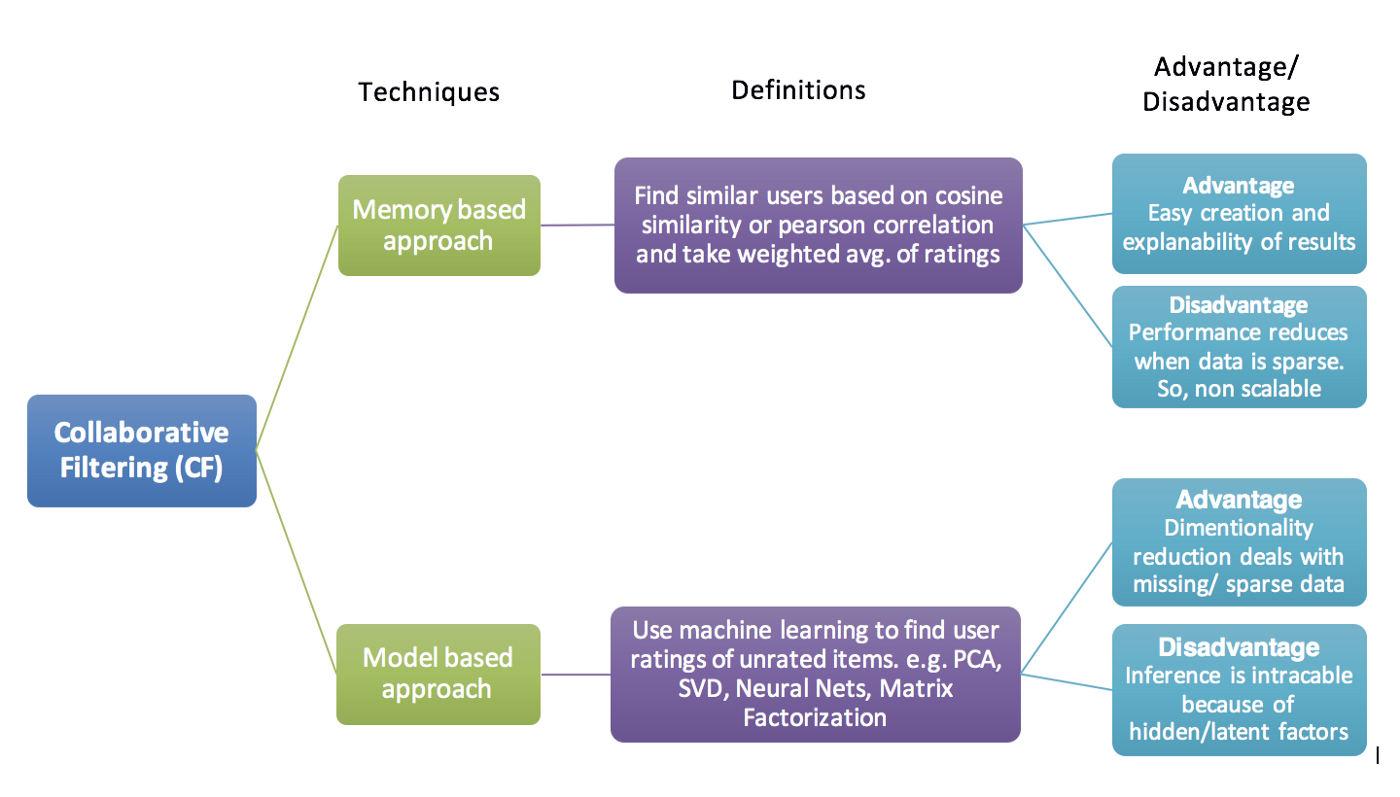

## Approach to the problem statement

We do not want to find a similarity between users or books. we want to do that If there is user A who has read and liked x and y books, And user B has also liked this two books and now user A has read and liked some z book which is not read by B so we have to recommend z book to user B. This is what collaborative filtering is.

So this is achieved using Matrix Factorization, we will create one matrix where columns will be users and indexes will be books and value will be rating. Like we have to create a Pivot table.

* **Lets first build a recommender system using Neigherest neighbour:**

In [ ]:
# Lets check the unique users who has given many ratings
merged_data['User-ID'].value_counts()

11676     11144
198711     6456
153662     5814
98391      5779
35859      5646
          ...  
51911         1
151772        1
158802        1
243672        1
259920        1
Name: User-ID, Length: 92106, dtype: int64

So, here in the above table we can see that the user-id[11676] has given 11144 ratings on different books,user-id[198711] has given 6456 ratings on different books,user-is[153662] has given 5814 ratings on different books,similarly that of the others users.   

## A big flaw with the problem statement in the dataset


If we take all the books and all the users for modeling, Don’t you think will it create a problem? So what we have to do is we have to decrease the number of users and books because we cannot consider a user who has only registered on the website or has only read one or two books. On such a user, we cannot rely to recommend books to others because we have to extract knowledge from data. So what we will limit this number and we will take a user who has rated at least 200 books and also we will limit books and we will take only those books which have received at least 50 ratings from a user.

In [ ]:
# lets check the unique users who has given ratings
merged_data['User-ID'].value_counts().shape

(92106,)

So, there are 92106 unique users who has given ratings.

Lets now find out that users who has given more than 200 ratings because only these user's ratings going to help us to recommend books

In [ ]:
# lets now find out unique users who has given more than 200 ratings on books
merged_data['User-ID'].value_counts()>200

11676      True
198711     True
153662     True
98391      True
35859      True
          ...  
51911     False
151772    False
158802    False
243672    False
259920    False
Name: User-ID, Length: 92106, dtype: bool

Lets take out the unique users who has given more than 200 ratings from above table

In [ ]:
# For taking out that unique users who has given more than 200 ratings lets create a variable
x=merged_data['User-ID'].value_counts()>200

In [ ]:
# lets now extract that unique users who has given more than 200 ratings on different books
x[x]

11676     True
198711    True
153662    True
98391     True
35859     True
          ... 
246311    True
164323    True
201783    True
214272    True
269890    True
Name: User-ID, Length: 811, dtype: bool

So,These are that unique users who has given more then 200 ratings

In [ ]:
# lets count that unique users
x[x].shape

(811,)

So, there are 811 users who has given more than 200 ratings on different books. 

In [ ]:
# lets now create a new variable for these unique users
y=x[x] 

In [ ]:
# lets find out index of these unique users
y=x[x].index
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            196047, 240567, 142093, 207782, 178199, 246311, 164323, 201783,
            214272, 269890],
           dtype='int64', length=811)

Okay,so lets now replace these unique users in the original dataset

In [ ]:
# lets replace these unique users in the dataset
merged_data = merged_data[merged_data['User-ID'].isin(y)]

In [ ]:
# lets now check shape
merged_data.shape

(474007, 9)

So, now there are 474007 rows and 9 features with unique users

In [ ]:
# lets groupby book-title and book-rating
number_rating=merged_data.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [ ]:
# lets see it
number_rating

Book-Title  Book-Rating
0        A Light in the Storm: The Civil War Diary of ...            2
1                                   Always Have Popsicles            1
2                    Apple Magic (The Collector's series)            1
3        Beyond IBM: Leadership Marketing and Finance ...            1
4        Clifford Visita El Hospital (Clifford El Gran...            1
...                                                   ...          ...
155840                             Ã?Â?ber das Fernsehen.            2
155841  Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...            3
155842                                      Ã?Â?lpiraten.            1
155843                              Ã?Â?stlich der Berge.            1
155844                                  Ã?Â?thique en toc            1

[155845 rows x 2 columns]

In [ ]:
# lets rename book-rating as number of rating
number_rating.rename(columns={'Book-Rating':'number of ratings'},inplace =True)


In [ ]:
# lets see number rating
number_rating

Book-Title  number of ratings
0        A Light in the Storm: The Civil War Diary of ...                  2
1                                   Always Have Popsicles                  1
2                    Apple Magic (The Collector's series)                  1
3        Beyond IBM: Leadership Marketing and Finance ...                  1
4        Clifford Visita El Hospital (Clifford El Gran...                  1
...                                                   ...                ...
155840                             Ã?Â?ber das Fernsehen.                  2
155841  Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...                  3
155842                                      Ã?Â?lpiraten.                  1
155843                              Ã?Â?stlich der Berge.                  1
155844                                  Ã?Â?thique en toc                  1

[155845 rows x 2 columns]

In [ ]:
# lets merge this new number of rating with merged data
final_rating=merged_data.merge(number_rating,on='Book-Title')

In [ ]:
# lets see it
final_rating

ISBN  ... number of ratings
0       0002005018  ...                 4
1       0002005018  ...                 4
2       0002005018  ...                 4
3       0002005018  ...                 4
4       0399135782  ...               109
...            ...  ...               ...
474002  0515108707  ...                 1
474003  1902035046  ...                 1
474004  0446352543  ...                 1
474005  0821764667  ...                 1
474006  0263775771  ...                 1

[474007 rows x 10 columns]

In [ ]:
# lets check shape of it
final_rating.shape

(474007, 10)

In [ ]:
# lets check those number of rating which is greater than equal to 50
final_rating=final_rating[final_rating['number of ratings']>=50]

In [ ]:
# lets check its shape
final_rating.shape

(58586, 10)

In [ ]:
# lets drop duplicate vvalues of Book-Title and User-Id if any
final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [ ]:
# lets now check its shape
final_rating.shape

(56629, 10)

Lets,now create a pivot table

In [ ]:
# lets create a pivot table
book_pivot=final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')

In [ ]:
# lets check book_pivot metrix
book_pivot

User-ID                                             254     ...  278418
Book-Title                                                  ...        
1984                                                   9.0  ...     NaN
1st to Die: A Novel                                    NaN  ...     NaN
2nd Chance                                             NaN  ...     NaN
4 Blondes                                              NaN  ...     NaN
A Bend in the Road                                     0.0  ...     NaN
...                                                    ...  ...     ...
Year of Wonders                                        NaN  ...     NaN
You Belong To Me                                       NaN  ...     NaN
Zen and the Art of Motorcycle Maintenance: An I...     NaN  ...     NaN
Zoya                                                   NaN  ...     NaN
\O\" Is for Outlaw"                                    NaN  ...     NaN

[706 rows x 810 columns]

In [ ]:
# lets check shape of book_pivot table
book_pivot.shape

(706, 810)

In [ ]:
# lets now fill nan values by 0
book_pivot.fillna(0,inplace=True)

In [ ]:
# lets now see book_ pivot
book_pivot

User-ID                                             254     ...  278418
Book-Title                                                  ...        
1984                                                   9.0  ...     0.0
1st to Die: A Novel                                    0.0  ...     0.0
2nd Chance                                             0.0  ...     0.0
4 Blondes                                              0.0  ...     0.0
A Bend in the Road                                     0.0  ...     0.0
...                                                    ...  ...     ...
Year of Wonders                                        0.0  ...     0.0
You Belong To Me                                       0.0  ...     0.0
Zen and the Art of Motorcycle Maintenance: An I...     0.0  ...     0.0
Zoya                                                   0.0  ...     0.0
\O\" Is for Outlaw"                                    0.0  ...     0.0

[706 rows x 810 columns]

## Modelling


We have prepared our dataset for modeling. we will use the nearest neighbors algorithm which is the same as K nearest which is used for clustering based on euclidian distance.

But here in the pivot table, we have lots of zero values and on clustering, this computing power will increase to calculate the distance of zero values so we will convert the pivot table to the sparse matrix and then feed it to the model.

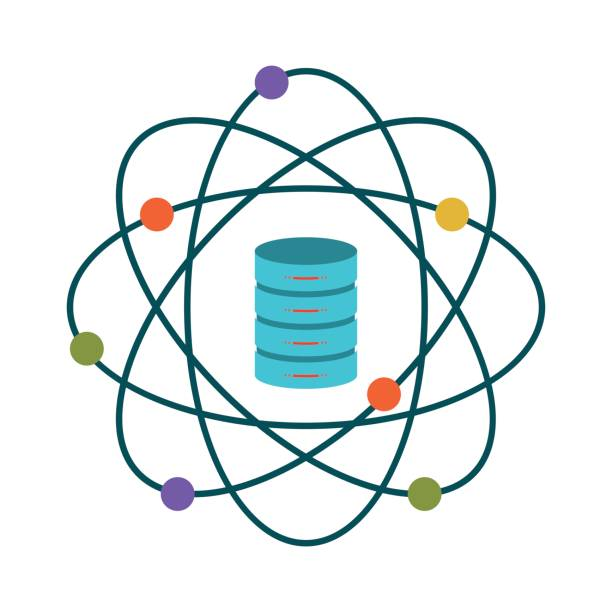

In [ ]:
# lets convert book-pivot into sparse metrix
from scipy.sparse import csr_matrix
book_sparse=csr_matrix(book_pivot)

In [ ]:
# lets check type of book_sparse
type(book_sparse)

scipy.sparse.csr.csr_matrix

Now we will train the nearest neighbors algorithm. here we need to specify an algorithm which is brute means find the distance of every point to every other point.

In [ ]:
# lets import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm='brute')

In [ ]:
# lets now train our model
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [ ]:
# lets evaluate it
distances,suggestions=model.kneighbors(book_pivot.iloc[175,:].values.reshape(1,-1),n_neighbors=6)

In [ ]:
distances

array([[ 0.        , 16.61324773, 16.673332  , 17.54992877, 17.66352173,
        17.8605711 ]])

In [ ]:
suggestions

array([[175, 280, 142, 566, 357, 177]])

In [ ]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Exclusive', 'Jacob Have I Loved', 'Deck the Halls (Holiday Classics)',
       'The Long Road Home', 'No Safe Place', 'Eyes of a Child'],
      dtype='object', name='Book-Title')


In [ ]:
np.where(book_pivot.index=='Exclusive')[0][0]

175

In [ ]:
# lets define a fuinction
def recommend_book(book_name):
  book_id=np.where(book_pivot.index==book_name)[0][0]
  distances,suggestions=model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1),n_neighbors=6)

  for i in range(len(suggestions)):
    if i==0:
      print("The suggestion for",book_name,"are:")
      if not i:
        print(book_pivot.index[suggestions[i]]) 
  


In [ ]:
# lets check
recommend_book('Harry Potter and the Chamber of Secrets (Book 2)')

The suggestion for Harry Potter and the Chamber of Secrets (Book 2) are:
Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))'],
      dtype='object', name='Book-Title')


Great, our model is performing well

# 2. Popularity Based (Top In whole collection)

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up. Book weighted avg formula:

**Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]**

where,

**v** is the number of votes for the books;

**m** is the minimum votes required to be listed in the chart;

**R** is the average rating of the book; and

**C** is the mean vote across the whole report.

Now we find the values of **v,m,R,C**.

In [ ]:
C= merged_data['Avg_Rating'].mean()
m= merged_data['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = merged_data.loc[merged_data['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504972 , m=64.0


(38570, 13)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.

We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('pink',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)


The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

##Model Based Collaborative Filtering Recommender:-

The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering. Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based. Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space. The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.



In [ ]:
#lets import the important libraries to proceed
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books. The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [ ]:
rating_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [ ]:
user_ratings_threshold = 3

filter_users = rating_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = rating_explicit[rating_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


### **SVD and NMF models comparison:-**

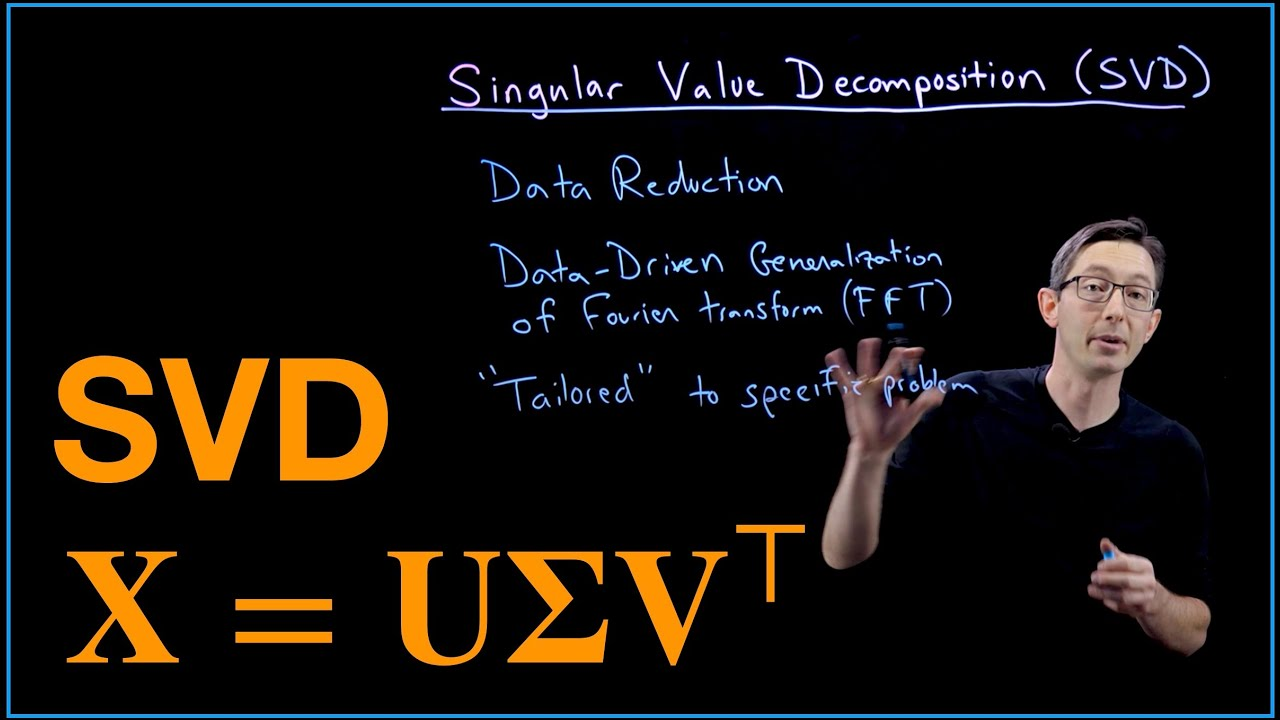

Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

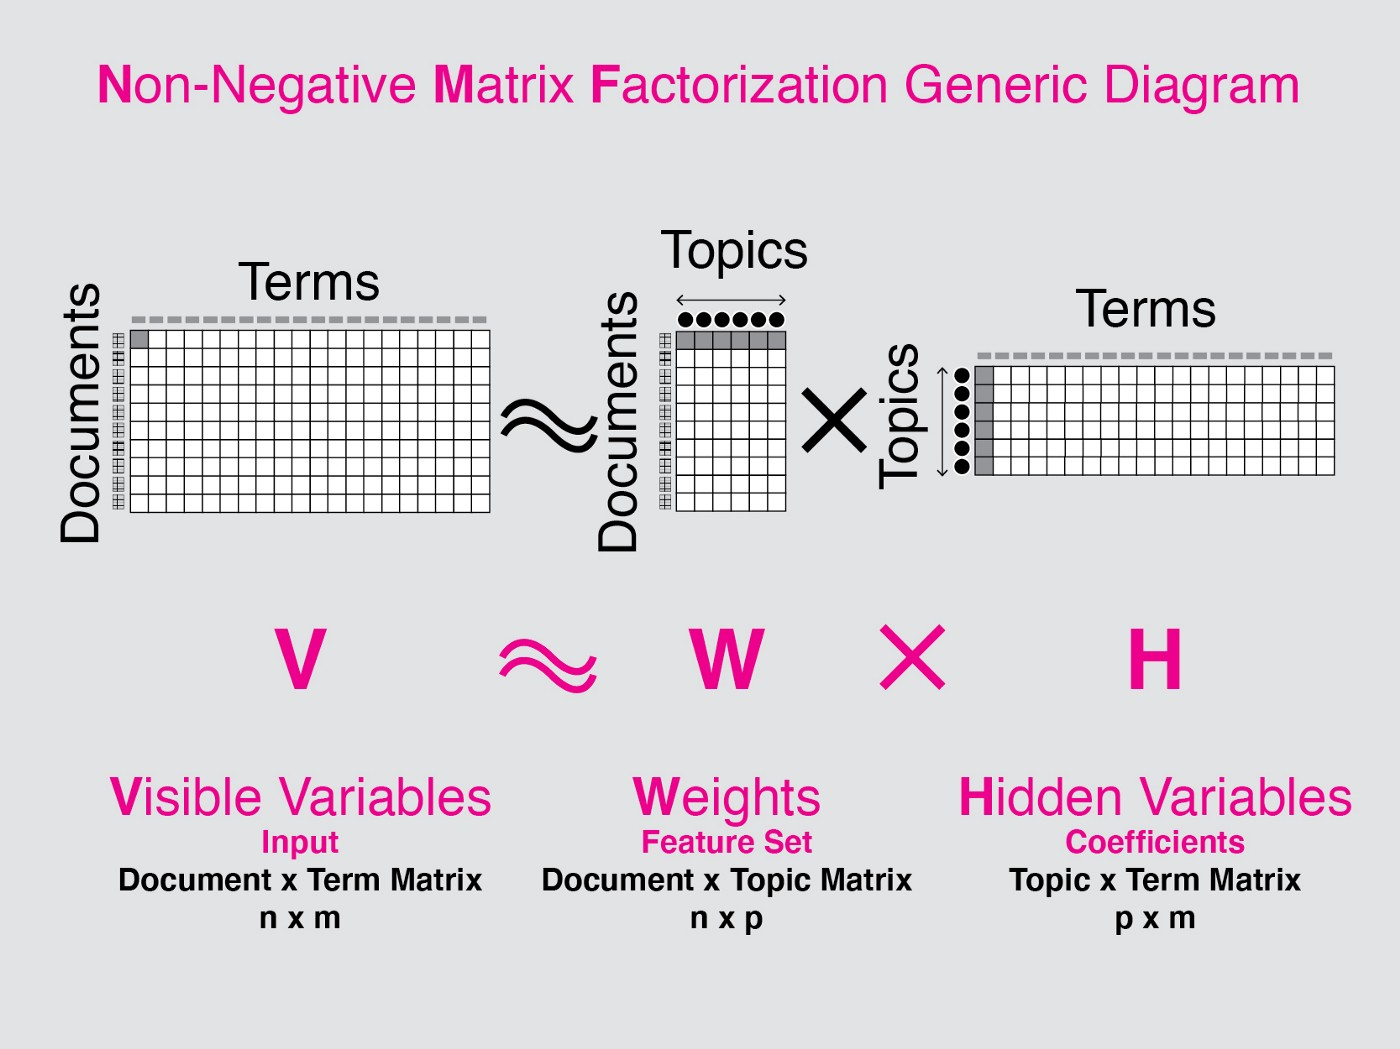

In [ ]:
# lets install the surprise package
!pip install surprise

     |████████████████████████████████| 11.8 MB 1.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630199 sha256=1b79d06428579ee6c23fe3965dc1d962ef92ef93e72a7d27c14926867d9334f0
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
# lets import these 
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'rating']], reader)

In [ ]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse     1.614826
test_mae      1.246254
fit_time     22.863827
test_time     2.224413
dtype: float64

In [ ]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.524213
test_mae      2.111490
fit_time     30.992556
test_time     1.230677
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

### **Optimisation of SVD algorithm:-**


Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters. It is used to find the best setting of parameters: n_factors - the number of factors n_epochs - the number of iteration of the SGD procedure lr_all - the learning rate for all parameters reg_all - the regularization term for all parameters As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [ ]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.610684880652683
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


### Analysis of Collaborative Filtering model results:-

In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [ ]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [ ]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

user_id        isbn  actual_rating  pred_rating  impossible  \
38622   153662  051770448X           10.0     8.487285       False   
53958   213518  0767917219            5.0     7.359823       False   
44087   148258  0609804731            8.0     7.758756       False   
44856   154129  0345378512            8.0     7.386660       False   
31532   254206  1929462239           10.0     9.368179       False   

       pred_rating_round   abs_err  
38622                8.0  1.512715  
53958                7.0  2.359823  
44087                8.0  0.241244  
44856                7.0  0.613340  
31532                9.0  0.631821

Distribution of actual and predicted ratings in the test set According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.

It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.



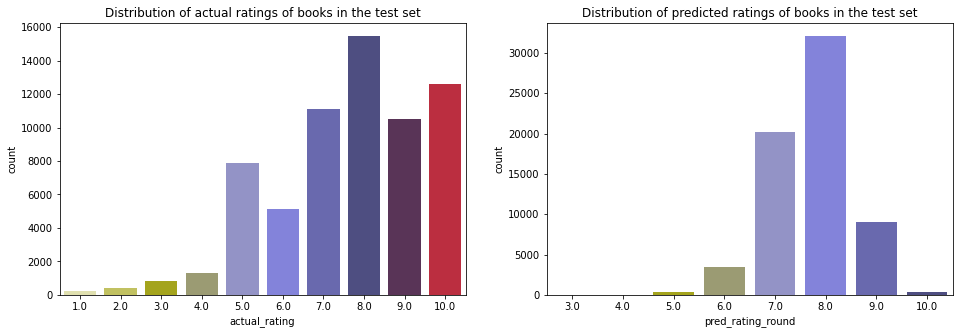

In [ ]:
palette = sns.color_palette("gist_stern_r", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

### Absolute error of predicted ratings:-

The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10. How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

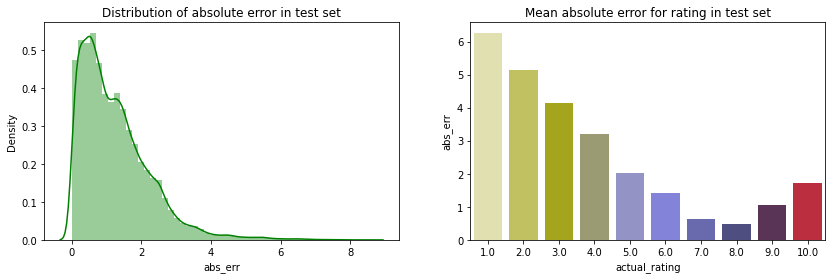

In [ ]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='green', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

### Analysis of predicted ratings of a particular user:-

For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [ ]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

### Train set: Top rated books:-

In [ ]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['rating']>=9)].sample(10)

user_id        isbn  rating  Avg_Rating  Total_No_Of_Users_Rated  \
234959   193458  0671880314       9    8.305556                       36   
234895   193458  0064471098       9    8.733333                       15   
234996   193458  1853260169      10    8.153846                       13   
234921   193458  0345361792      10    8.607735                      181   
234963   193458  0679429220       9    7.794393                      107   
234893   193458  0064471071       9    8.733333                       15   
234905   193458  0140620125       9    8.133333                       15   
234977   193458  0887309100       9    7.600000                        5   
234955   193458  0670873888       9    9.000000                        1   
234891   193458  0064471055       9    8.545455                       22   

                                               book_title  pred_rating  
234959                                   Schindler's List          NaN  
234895                                   The Silver Chair          NaN  
234996        Sense and Sensibility (Wordsworth Classics)          NaN  
234921                            A Prayer for Owen Meany          NaN  
234963  Midnight in the Garden of Good and Evil: A Sav...          NaN  
234893     The Voyage of the Dawn Treader (rack) (Narnia)          NaN  
234905       Wuthering Heights (Penguin Popular Classics)          NaN  
234977  The Dilbert Future: Thriving on Business Stupi...          NaN  
234955  On South Mountain: The dark secrets of the Gol...          NaN  
234891  Prince Caspian (rack) : The Return to Narnia (...          NaN

### Test set: predicted top rated books:-

In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

user_id        isbn  rating  Avg_Rating  Total_No_Of_Users_Rated  \
234894   193458  006447108X       9    8.833333                       18   
234950   193458  0553258001       9    8.236842                       38   
234927   193458  0345424719       8    8.017544                       57   
234892   193458  0064471063       9    8.518519                       27   
234967   193458  0767904133       8    7.777778                        9   

                                               book_title  pred_rating  
234894                                    The Last Battle     8.187259  
234950                              The Cider House Rules     8.173742  
234927                               A Widow for One Year     7.846030  
234892                              The Horse and His Boy     7.802707  
234967  Close to Shore: A True Story of Terror in an A...     7.758908

### Test set: actual top rated books:-

In [ ]:
df_user[df_user['pred_rating'].notna()].sort_values('rating', ascending=False).head(5)

user_id        isbn  rating  Avg_Rating  Total_No_Of_Users_Rated  \
234994   193458  1853260002      10    8.217391                       23   
234892   193458  0064471063       9    8.518519                       27   
234894   193458  006447108X       9    8.833333                       18   
234900   193458  0140298479       9    7.539823                      113   
234969   193458  0789404257       9    9.000000                        4   

                                         book_title  pred_rating  
234994  Pride &amp; Prejudice (Wordsworth Classics)     7.545970  
234892                        The Horse and His Boy     7.802707  
234894                              The Last Battle     8.187259  
234900            Bridget Jones: The Edge of Reason     7.457934  
234969   Eyewitness Travel Guide to Italy (revised)     7.699836

# Collaborative Filtering based Recommendation System--(User-Item Based)

In [ ]:
# lets import important libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import correlation
import operator
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [ ]:
# Taking book name and Number of recommendation of book
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Enter number of books to recommend: 5


In [ ]:
df = pd.DataFrame(merged_data['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = merged_data.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [ ]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['rating'] = popular_book['rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','rating']].groupby(testdf['ISBN'])

In [ ]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [ ]:
def printBookDetails(bookID):
    print(merged_data[merged_data['ISBN']==bookID]['Book-Title'].values[0])
   

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if merged_data[merged_data['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(merged_data[merged_data['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(merged_data[merged_data['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

In [ ]:
k = list(merged_data['Book-Title'])
m = list(merged_data['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Fried Green Tomatoes at the Whistle Stop Cafe


### Correlation Based:-

In [ ]:
popularity_threshold = 50

user_count = merged_data['User-ID'].value_counts()
data = merged_data[merged_data['User-ID'].isin(user_count[user_count >= popularity_threshold].index)]
rat_count = data['rating'].value_counts()
data = data[data['rating'].isin(rat_count[rat_count >= popularity_threshold].index)]

matrix = data.pivot_table(index='User-ID', columns='ISBN', values = 'rating').fillna(0)

In [ ]:
average_rating = pd.DataFrame(merged_data.groupby('ISBN')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(rating.groupby('ISBN')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

rating  ratingCount
ISBN                             
0971880107  4.390706         2502
0316666343  8.185290         1295
0385504209  8.435318          883
0060928336  7.887500          732
0312195516  8.182768          723

In [ ]:
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

res = corr.sort_values('Pearson Corr', ascending=False).head(number+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
print("\n Recommended Books: \n")
corr_books


 Recommended Books: 



ISBN                                         Book-Title  \
0  0439064872   Harry Potter and the Chamber of Secrets (Book 2)   
1  0439136369  Harry Potter and the Prisoner of Azkaban (Book 3)   
2  0439139597       Harry Potter and the Goblet of Fire (Book 4)   
3  0804115613      Fried Green Tomatoes at the Whistle Stop Cafe   
4  0439139600       Harry Potter and the Goblet of Fire (Book 4)   

     Book-Author  Year-Of-Publication              Publisher  
0  J. K. Rowling                 2000             Scholastic  
1  J. K. Rowling                 2001             Scholastic  
2  J. K. Rowling                 2000             Scholastic  
3   Fannie Flagg                 2000       Ballantine Books  
4  J. K. Rowling                 2002  Scholastic Paperbacks

### Content Based:-

In [ ]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(44619, 8)

In [ ]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(44619, 1112)

In [ ]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(44619, 44619)

In [ ]:
print("Recommended Books:\n")
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < number:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)


## Hybrid Approach (Content+Collaborative) Using percentile:-

In [ ]:
z = list()
k = float(1/number)
for x in range(number):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w=0
print("Input Book:\n")
print(bookName)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w>=number:
        break
    w+=1
    print(x)

Input Book:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Recommended Books:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)


# Collaborative Filtering based Recommendation System--(User-Item based)

In [ ]:
rating_explicit.head()
rating_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [ ]:
users_interactions_count_df = rating_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 449


In [ ]:
print('# of interactions: %d' % len(rating_explicit))
interactions_from_selected_users_df = rating_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [ ]:
interactions_from_selected_users_df.head(10)

User-ID        ISBN  rating  Avg_Rating  Total_No_Of_Users_Rated
0     2033  0030020786       7    7.000000                        1
1     2033  0060248025      10    8.766667                       30
2     2033  0060256664      10    8.333333                        6
3     2033  0060256737      10    9.045455                       22
4     2033  0060950536      10    9.400000                        5
5     2033  0061020419       7    7.000000                        1
6     2033  0061020427       6    6.000000                        1
7     2033  0061056278      10    9.000000                        2
8     2033  0061056286       8    7.666667                        3
9     2033  0061056294       9    7.000000                        2

In [ ]:
import math

In [ ]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


ISBN  User-ID    rating
0  0000913154   171118  3.169925
1  0001046438    23902  3.321928
2  000104687X    23902  2.807355
3  0001047213    23902  3.321928
4  0001047973    23902  3.321928

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42,)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [ ]:
interactions_test_df.head()

ISBN  User-ID    rating
87596  0879051213    95010  3.000000
52630  0515101230   129074  3.000000
68434  0679427724    75819  3.169925
85835  0843951346   135149  3.321928
92752  1551665727   158295  3.169925

In [ ]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN     0000913154  000104687X  0001047213  0001047973  000104799X  \
User-ID                                                               
2033            0.0         0.0         0.0         0.0         0.0   
2110            0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
4017            0.0         0.0         0.0         0.0         0.0   
4385            0.0         0.0         0.0         0.0         0.0   

ISBN     0001048082  0001053736  0001055607  0001056107  0001845039  ...  \
User-ID                                                              ...   
2033            0.0         0.0         0.0         0.0         0.0  ...   
2110            0.0         0.0         0.0         0.0         0.0  ...   
2276            0.0         0.0         0.0         0.0         0.0  ...   
4017            0.0         0.0         0.0         0.0         0.0  ...   
4385            0.0         0.0         0.0         0.0         0.0  ...   

ISBN     B00007FYKW  B00008RWPV  B00009NDAN  B0000DYXID  B0000T6KHI  \
User-ID                                                               
2033            0.0         0.0         0.0         0.0         0.0   
2110            0.0         0.0         0.0         0.0         0.0   
2276            0.0         0.0         0.0         0.0         0.0   
4017            0.0         0.0         0.0         0.0         0.0   
4385            0.0         0.0         0.0         0.0         0.0   

ISBN     B0000VZEJQ  B0000X8HIE  B00013AX9E  B0001I1KOG  B000234N3A  
User-ID                                                              
2033            0.0         0.0         0.0         0.0         0.0  
2110            0.0         0.0         0.0         0.0         0.0  
2276            0.0         0.0         0.0         0.0         0.0  
4017            0.0         0.0         0.0         0.0         0.0  
4385            0.0         0.0         0.0         0.0         0.0  

[5 rows x 55743 columns]

In [ ]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [ ]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 12

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [ ]:
users_items_pivot_matrix.shape

(449, 55743)

In [ ]:
U.shape

(449, 12)

In [ ]:
sigma = np.diag(sigma)
sigma.shape

(12, 12)

In [ ]:
Vt.shape

(12, 55743)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [ ]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 2.62206715e-02,  3.97350202e-03,  4.70182373e-03, ...,
         1.02628920e-04,  3.46975615e-04,  3.16700270e-03],
       [ 4.10785318e-03, -2.12791913e-04, -2.51795535e-04, ...,
         4.64353850e-05,  1.04160022e-04,  9.39852813e-04],
       [ 4.48771337e-03, -6.29288514e-04, -7.44633739e-04, ...,
         9.48566209e-05,  2.54799688e-04,  2.13530628e-03],
       ...,
       [ 1.03021309e-02,  3.63500024e-03,  4.30127639e-03, ...,
         7.86583738e-05,  1.71570440e-04,  1.66888361e-03],
       [ 2.01410405e-02, -3.23814018e-04, -3.83167399e-04, ...,
         1.68822240e-04,  3.54759017e-04,  3.48212482e-03],
       [ 8.77622687e-04,  5.64808952e-03,  6.68335419e-03, ...,
         3.96499174e-05,  6.47102205e-05,  7.32636937e-04]])

In [ ]:
all_user_predicted_ratings.shape

(449, 55743)

In [ ]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

2033      2110      2276      4017      4385      5582    \
ISBN                                                                     
0000913154  0.026221  0.004108  0.004488  0.009121 -0.001153  0.002134   
000104687X  0.003974 -0.000213 -0.000629  0.020015 -0.000508  0.010179   
0001047213  0.004702 -0.000252 -0.000745  0.023684 -0.000601  0.012045   
0001047973  0.004702 -0.000252 -0.000745  0.023684 -0.000601  0.012045   
000104799X  0.000631  0.000252  0.000522  0.001383  0.000193  0.000647   

              6242      6251      6543      6575    ...    269566    270713  \
ISBN                                                ...                       
0000913154  0.001350  0.023186  0.010196  0.035515  ...  0.011128  0.019416   
000104687X  0.015187  0.011271 -0.000875  0.021808  ... -0.000056  0.016405   
0001047213  0.017970  0.013337 -0.001035  0.025806  ... -0.000066  0.019412   
0001047973  0.017970  0.013337 -0.001035  0.025806  ... -0.000066  0.019412   
000104799X  0.000779  0.001187  0.001132  0.002285  ...  0.000722  0.001497   

              271448    271705    273113    274061    274301    275970  \
ISBN                                                                     
0000913154  0.009915  0.016783 -0.003976  0.021694  0.020988  0.010302   
000104687X  0.002521  0.015567 -0.002296 -0.001785  0.011500  0.003635   
0001047213  0.002983  0.018421 -0.002716 -0.002112  0.013608  0.004301   
0001047973  0.002983  0.018421 -0.002716 -0.002112  0.013608  0.004301   
000104799X  0.001706  0.000615  0.000997  0.001128  0.001289  0.000399   

              277427    278418  
ISBN                            
0000913154  0.020141  0.000878  
000104687X -0.000324  0.005648  
0001047213 -0.000383  0.006683  
0001047973 -0.000383  0.006683  
000104799X  0.000928  0.000185  

[5 rows x 449 columns]

In [ ]:
len(cf_preds_df.columns)

449

In [ ]:
global books
books.head()

ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author  Year-Of-Publication                   Publisher  
0    Mark P. O. Morford                 2002     Oxford University Press  
1  Richard Bruce Wright                 2001       HarperFlamingo Canada  
2          Carlo D'Este                 1991             HarperPerennial  
3      Gina Bari Kolata                 1999        Farrar Straus Giroux  
4       E. J. W. Barber                 1999  W. W. Norton &amp; Company

In [ ]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [ ]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [ ]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [ ]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

#### Let's recommend books to User-Id 69078 and see the results.

In [ ]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  69078
Recommendation for User-ID =  69078
         ISBN                                         Book-Title  recStrength
0  0312195516                The Red Tent (Bestselling Backlist)     0.377661
1  0385504209                                  The Da Vinci Code     0.329691
2  0312966970             Four To Score (A Stephanie Plum Novel)     0.329657
3  0671001795                                  Two for the Dough     0.323928
4  0446610038                                1st to Die: A Novel     0.317324
5  0061009059  One for the Money (Stephanie Plum Novels (Pape...     0.315896
6  0312980140                  Seven Up (A Stephanie Plum Novel)     0.314485
7  0440214041                                  The Pelican Brief     0.309228
8  0142001740                            The Secret Life of Bees     0.297225
9  0440226430                                     Summer Sisters     0.297103


## Evaluate:-



In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set. This evaluation method works as follows:

* For each user:-

    * For each item the user has interacted in test set.
    * Sample 100 other items the user has never interacted.
    * Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
    * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics



In [ ]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(rating_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

     # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

## Evaluating the Collaborative Filtering model (SVD matrix factorization), we observe that we got Recall@5 (22%) and Recall@10 (29%).

# Conclusion:-

* In EDA, the Top-10 most rated books were essentially novels. Books like The Lovely Bone and The Secret Life of Bees were very well perceived.
* Majority of the readers were of the age bracket 20–35 and most of them came from North American and European countries namely USA, Canada, UK, Germany and Spain.
* If we look at the ratings distribution, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.
* Author with the most books was Agatha Christie, William Shakespeare and Stephen King.
* For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE) .
* Amongst the memory based approach, item-item CF performed better than user-user CF because of lower computation requirements .


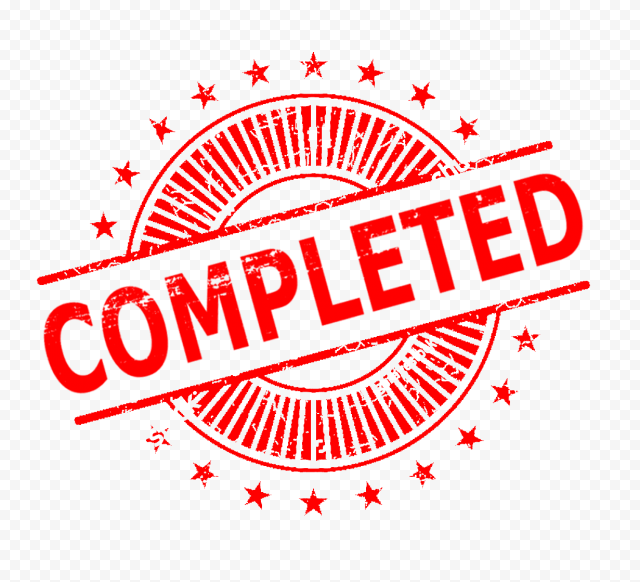